In [1]:
import copy
import importlib
import numpy as np
import os
import scipy.stats as spstats
import sys

# Import necessary scripts in a hacky way - should just make a proper __init__.py and package
# Not sure what to do about the python path though
sys.path.insert(0, os.path.join("/home","dtaranu","src","mine","taranu_lsst"))
import make_cutout as cutouts
import test_lsst_cmodel as tlc

In [4]:
# Setup for plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import lsst.afw.display as afwDisplay
import lsst.afw.image as afwImage

plt.style.use('seaborn-notebook')
mpl.rcParams['figure.dpi'] = 150

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# Set up butlers and some conveniences
config = tlc.setupCModelConfig()
[butlers, butlerdefault] = tlc.getCModelButlers(config["params"], config["butlerdata"], config["stack"], config["path"])
meastabledefault = butlerdefault["measures"]
calexp = butlerdefault["calexp"]
cmodelpre = 'modelfit_CModel'
objectisprimary = measdefault['detect_isPrimary']

Loading non-default: w_2018_14_gradthresh_1e-1 from path /project/dtaranu/cmodelconfigs/
Loading non-default: w_2018_14_gradthresh_1e-2 from path /project/dtaranu/cmodelconfigs/
Loading non-default: w_2018_14_gradthresh_1e-3 from path /project/dtaranu/cmodelconfigs/
Loading non-default: w_2018_14_maxinnerit8 from path /project/dtaranu/cmodelconfigs/
Skipping default: w_2018_14_maxinnerit20 from path /project/dtaranu/cmodelconfigs/
Loading non-default: w_2018_14_maxinnerit50 from path /project/dtaranu/cmodelconfigs/
Loading non-default: w_2018_14_nComp2 from path /project/dtaranu/cmodelconfigs/
Skipping default: w_2018_14_nComp3 from path /project/dtaranu/cmodelconfigs/
Loading non-default: w_2018_14_nComp6 from path /project/dtaranu/cmodelconfigs/
Loading non-default: w_2018_14_nfitrad_2 from path /project/dtaranu/cmodelconfigs/
Skipping default: w_2018_14_nfitrad_3 from path /project/dtaranu/cmodelconfigs/
Loading non-default: w_2018_14_nfitrad_5 from path /project/dtaranu/cmodelconfi

In [124]:
# Test re-running cModel
objdefault = butlers["gradthresh"]["1e-2"]["measures"][cmodelpre + "_exp_objective"][objectisprimary]
objcompare = butlers["gradthresh"]["1e-3"]["measures"][cmodelpre + "_exp_objective"][objectisprimary]
objdiff = objdefault - objcompare

print(spstats.describe(objdiff[np.isfinite(objdiff)]))

cmodelrerun = False
if cmodelrerun:
    calexpcopy = copy.deepcopy(butlerdefault['calexp'])
    [measTask, noiseReplacer, newSrcCatalog] = tlc.getCModelRerunTask([idtarget], meastabledefault, calexpcopy)
    measTask.runPlugins(noiseReplacer, newSrcCatalog, calexpcopy)

DescribeResult(nobs=14691, minmax=(-10.514891199935731, 14.663174289045688), mean=0.00022704382961570362, variance=0.05027343139401437, skewness=18.76112503065156, kurtosis=2278.118230030694)


/software/lsstsw/stack3_20171023/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


In [116]:
cmodelpre = 'modelfit_CModel'
objectiveisinf = np.where(np.isinf(meastabledefault[cmodelpre + "_objective"]))[0]
expfailed = ~np.isfinite(meastabledefault[cmodelpre + "_exp_objective"]) & ~meastabledefault[cmodelpre + "_initial_flag"]
expfailednonnumericprimary = expfailed & ~meastabledefault[cmodelpre + "_dev_flag_numericError"] & measdefault['detect_isPrimary']
for fluxtype in ["slot_" + i + "Flux_flux" for i in ["Ap", "Psf"]]:
    print(meastabledefault[fluxtype][objectiveisinf])
    print(meastabledefault[fluxtype][expfailednonnumericprimary])


[ 0.53084606  1.04493499  0.90271127  0.48341078  0.77430075  1.59074914
  1.78995717  1.85844314  0.71988255  0.57775354  0.685018    0.48180634
  0.19690721  0.27514842 -0.55818123  0.05127216  0.57495981  0.17136368
  0.47254068  0.77568787  0.34819388  0.19699387  0.10248013  0.87536299
  0.68805712  0.10589774  1.19725096  0.83826315]
[ 2233.95849609  1601.81311035  1749.84863281  1305.82275391  3903.38818359
  2594.07080078  2384.15112305  2391.7434082    978.32684326   900.93707275
   658.79626465  1462.65466309  1772.9864502    431.06747437   286.00036621
     8.00278091  1308.73156738  1074.0435791     17.089571      15.48073959
     5.2234621   1197.00878906   985.29394531   614.88214111   499.36602783
   490.1574707    485.79406738]
[-0.09907793 -0.06020745 -0.04731608 -0.03877628 -0.09679123 -0.08039248
 -0.06483758 -0.16644554 -0.02797714  0.00248987  0.00312178  0.00335957
  0.00239216  0.00085024 -0.00275675  0.0002008   0.00727104  0.00228948
  0.00504078  0.00399336  0

row=19263 id=43158459910224371
ra,dec:  2.62510336307 , 0.0400375339424
pixel x,y:  14585.806566 , 19340.1211219
bbox= (minimum=(11900, 15900), maximum=(16099, 20099))
sizecutout= 44 xrange=[ 14581 14607 ]; yrange=[ 19322 19359 ]
mask shape= (4200, 4200)
variance shape= (4200, 4200)
Cutout within footprint: sum= 768.291 DescribeResult(nobs=740, minmax=(0.031437315, 0.57780373), mean=0.10265257, variance=0.0028825386, skewness=4.660040855407715, kurtosis=28.796170729462165)
Mask within footprint DescribeResult(nobs=740, minmax=(512, 53792), mean=21461.432432432433, variance=588185082.15645695, skewness=0.4736569735904061, kurtosis=-1.625690834767384)
0/740 unmasked


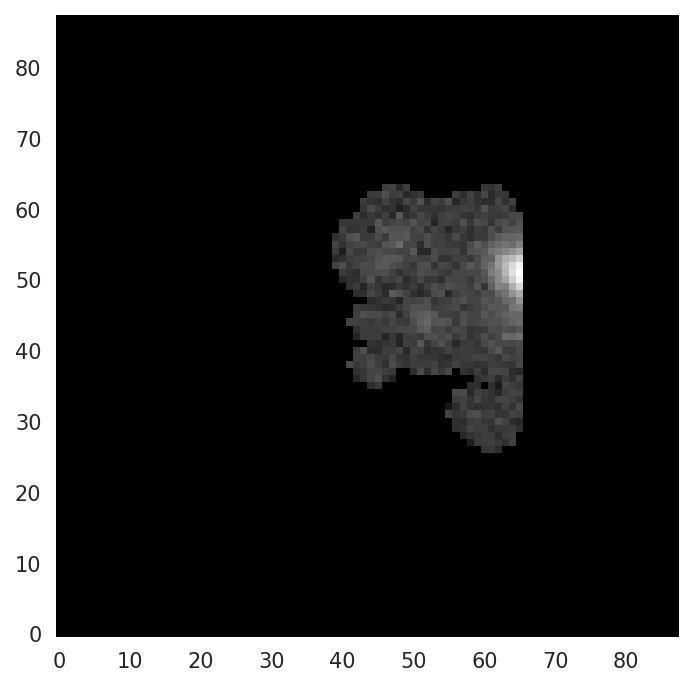

In [120]:
# Display a cutout of the galaxy (not sure why it only shows the one instead of both - TBD)
#displaycutout = afwDisplay.getDisplay(frame=1, backend='ds9')

cenx = meastabledefault['slot_Centroid_x']
ceny = meastabledefault['slot_Centroid_y']
ra = meastabledefault['coord_ra']
dec = meastabledefault['coord_dec']

rowtarget = np.int(np.where(expfailednonnumericprimary)[0][20])
idtarget = meastabledefault["id"][rowtarget]

print('row={:d} id={:d}'.format(rowtarget, idtarget))
print("ra,dec: ", ra[rowtarget], ",", dec[rowtarget])
print("pixel x,y: ", cenx[rowtarget], ",", ceny[rowtarget])

# Get the bounding box of the exposure
bbox = calexp.getBBox()
print("bbox=", bbox)

# Get the footprint of this object and indices in exposure/frame units
footprint = meastabledefault[rowtarget].getFootprint()
indy, indx = footprint.spans.indices()
indy = np.array(indy)
indx = np.array(indx)
# Why is there still no minmax in numpy?!
miny, maxy = [np.min(indy), np.max(indy)]
minx, maxx = [np.min(indx), np.max(indx)]
indy -= bbox.getMinY()
indx -= bbox.getMinX()

sizecutout = 2*np.int64(np.ceil(np.max([
    cenx[rowtarget]-minx, maxx-cenx[rowtarget]
    ,ceny[rowtarget]-miny, maxy-ceny[rowtarget]
])))
print("sizecutout=", sizecutout, "xrange=[", minx, maxx, "]; yrange=[", miny, maxy, "]")

mask = calexp.getMaskedImage().getMask()
print("mask shape=", mask.array.shape)
var = calexp.getVariance()
print("variance shape=", var.array.shape)

# Could do this for calexp after running noiseReplacer too
cutout = cutouts.make_cutout_lsst(coords = [cenx[rowtarget], ceny[rowtarget]], coord_units="pixels", exp=calexp, size=sizecutout)
# Cutout the mask and the footprint, bookkeeping annoying pixel offsets
maskcutout = mask.array[cutout[4][3]:cutout[4][2], cutout[4][1]:cutout[4][0]]
varcutout = var.array[cutout[4][3]:cutout[4][2], cutout[4][1]:cutout[4][0]]
footcutout = maskcutout*0
footcutout[indy-cutout[4][3], indx-cutout[4][1]] = 1
withinfoot = footcutout.flatten()==1
maskfoot = maskcutout.flatten()[withinfoot]
print("Cutout within footprint: sum=", np.sum(cutout[0]), spstats.describe(cutout[0].flatten()[withinfoot]))
print("Mask within footprint", spstats.describe(maskfoot))
print("{:d}/{:d} unmasked".format(np.sum(maskfoot == 0),len(maskfoot)))
#plt.imshow(np.arcsinh(cutout[0]*5), cmap="gray", origin="bottomleft")
plt.imshow(np.arcsinh(cutout[0]*5*footcutout), cmap="gray", origin="bottomleft")
#plt.imshow(np.arcsinh(varcutout*footcutout), cmap="gray", origin="bottomleft")
#plt.imshow(np.arcsinh(cutout[0]*5*footcutout*(maskcutout==0)), cmap="gray", origin="bottomleft")

In [6]:
# Print stats for PSF models used in cModel - these should not depend on config

measdefault = butlerdefault['measures']
tabdefault = measdefault.getTable()
namepsfmodel = "modelfit_DoubleShapeletPsfApprox"
flagpsfmodelprefix = namepsfmodel + "_flag"
columnspsf = tabdefault.getSchema().extract(namepsfmodel + "*")
primaryflag = measdefault['detect_isPrimary']
childflag = measdefault['deblend_nChild'] == 0

print('nisprimary=' + str(np.sum(primaryflag)) + "/" + str(len(primaryflag)))
print('nischild=' + str(np.sum(childflag)) + "/" + str(len(childflag)))

objectflags = {
    'any' : np.full(len(childflag), True, dtype=bool)
    ,'ischild' : childflag
    ,'isprimary' : primaryflag
}

psfstatsprint = True

# Print some PSF statistics - are the higher order moments actually used? Maybe, but they're mostly close to zero...
if psfstatsprint:
    for column in columnspsf:
        if column.startswith(flagpsfmodelprefix):
            print(column, np.sum(measdefault[column]))
        else:
            print(column, spstats.describe(measdefault[column]))

nisprimary=16945/21270
nischild=19208/21270
modelfit_DoubleShapeletPsfApprox_flag_badCentroid 5213
modelfit_DoubleShapeletPsfApprox_flag_badCentroid_edge 842
modelfit_DoubleShapeletPsfApprox_flag_badCentroid_noSecondDerivative 0
modelfit_DoubleShapeletPsfApprox_flag_badCentroid_almostNoSecondDerivative 404
modelfit_DoubleShapeletPsfApprox_flag_badCentroid_notAtMaximum 3472
modelfit_DoubleShapeletPsfApprox_flag_badCentroid_resetToPeak 495
modelfit_DoubleShapeletPsfApprox_0_xx DescribeResult(nobs=21270, minmax=(1.2385405979791737, 1.7613874337840909), mean=1.3685188483172923, variance=0.0033940036824871597, skewness=1.2393688484626606, kurtosis=3.2915186456812204)
modelfit_DoubleShapeletPsfApprox_0_yy DescribeResult(nobs=21270, minmax=(1.2149683194113241, 1.6801726846814626), mean=1.3474766759380006, variance=0.0025615249082920491, skewness=0.9843606856684435, kurtosis=2.807553493518813)
modelfit_DoubleShapeletPsfApprox_0_xy DescribeResult(nobs=21270, minmax=(-0.032018027927182786, 0.095

In [46]:
# Print some rather ugly summaries of table data
# TODO: Make a nicely formatted table out of this (try pandas first, then astropy)
# TODO: Visualize said table

cmodelparams = config["params"]
objectivedefaultvalue = -5000
countformat = '{:6d}'

params = ['flag' + var for var in ([''] + ['_{0}'.format(name) \
    for name in ['apCorr','maxIter','numericError','trSmall']])] + \
    ['flux' + var for var in ['', 'Sigma', '_inner']] + \
    ['nIter', 'objective', 'time']

# Consider searching from schema if new flags added
baseflags = ["_flag" + post for post in [""] +
                ["_region" + rpost for rpost in ["_maxArea", "_maxBadPixelFraction"]] +
                ["_noShape", "_noShapeletPsf", "_badCentroid"]
            ]

printparamsummary = True

fittypes = ['initial', 'exp', 'dev']

for key, butlerdict in butlers.items():
    
    keydefault = cmodelparams[key]['default']
    meastabledefault = butlerdict[keydefault]['measures']
    filtdefault = butlerdict[keydefault]['measures'][cmodelpre + '_initial_nIter'] > 0
    objectivedefaultfinal = meastabledefault[cmodelpre + '_objective'][filtdefault]
    objectivedefaultfinal[~np.isfinite(objectivedefaultfinal)] = objectivedefaultvalue
    
    print(butlerdict.keys())
    
    for configparam in cmodelparams[key]['names']:       
        isdefault = key == keydefault
        table = butlerdict[configparam]['measures']
        
        for flagname, flag in objectflags.items():
            print('Processing ' + key + '=' + configparam + ", flag=" + flagname)
            for profile in fittypes:
                # Summary
                flagisset = table[cmodelpre + '_' + profile + '_flag'][flag]
                flux = table[cmodelpre + '_' + profile + '_flux'][flag]
                objective = table[cmodelpre + '_' + profile + '_objective'][flag]
                fluxisneg = flux < 0
                fluxisnan = np.isnan(flux)
                objectivenotfinite = ~np.isfinite(objective)
                print(
                    '{:s} objects: {:d}, flux<0: {:d},'
                    'nan-flux {:d}, non-finite objective: {:d}, '
                    'intersect: {:d}\n'.format(
                        profile, len(fluxisneg), np.sum(fluxisneg),
                        np.sum(fluxisnan),
                        np.sum(objectivenotfinite),
                        np.sum(fluxisnan*objectivenotfinite)
                    )
                )
                print(spstats.describe(flux[~fluxisnan]), '\n')

                # Flux estimate summaries
                fluxes = dict.fromkeys([
                    'slot_ApFlux'
                    #,'slot_ModelFlux,
                    ,'slot_PsfFlux'
                ])

                for fluxname, fluxmeasure in fluxes.items():
                    for fluxfilter, fluxcondition in {
                        False : None
                        ,True: objectivenotfinite
                    }.items():
                        if not fluxfilter:
                            x = table[fluxname + '_flux'][flag]
                            fluxes[fluxname] = x
                        else:
                            x = fluxes[fluxname][fluxcondition]
                        xisnan = np.isnan(x)
                        print(fluxname, end="")
                        if fluxfilter:
                            print('[objectivenotfinite]', end="")
                        print((' nisnan=' + countformat).format(np.sum(xisnan)))
                        print(spstats.describe(x[~xisnan]), '\n')               

                # Parameter summaries
                printparams = ['_' + profile + '_' + p for p in params]
                if profile == "initial":
                    printparams += baseflags
                for param in printparams:
                    if printparamsummary:
                        flagfield = cmodelpre + param
                        x = table[cmodelpre + param][flag]
                        lenx = len(x)
                        isnan = np.isnan(x)
                        nansum = np.sum(isnan)
                        isfinite = np.isfinite(x)
                        notfinitesum = np.sum(~isfinite[~isnan])
                        x = x[isfinite]
                        isflag = table.schema.find(flagfield).key.getTypeString() == "Flag"
                        output = ('{:32s}: nansum=' + countformat + '; nanfrac={:.3f}; notfinitesum=' + \
                                 countformat + '; notfinitefrac={:.3f}')
                        output = output.format(param, nansum, nansum/lenx, notfinitesum, notfinitesum/lenx)
                        if isflag:
                            output += ('; count='+countformat).format(np.sum(x == 1))
                        if param in baseflags:
                            flagintersect = np.intersect1d(np.where(x), np.where(flagisset))
                            output += ('; _initial_flag_intersect=' + countformat).format(len(flagintersect))
                        print(output)
                        if not isflag:
                            print(spstats.describe(x))
                print('\n')

dict_keys(['1e-1', '1e-2', '1e-3'])
Processing gradthresh=1e-1, flag=any
initial objects: 21270, flux<0: 2180,nan-flux 484, non-finite objective: 484, intersect: 484

DescribeResult(nobs=20786, minmax=(-2.81068069977808, 14086.860384822781), mean=17.602314165780388, variance=25845.038250952672, skewness=54.154707614396095, kurtosis=4162.39347213964) 

slot_ApFlux nisnan=   292
DescribeResult(nobs=20978, minmax=(-3.3376719951629639, 4549.73974609375), mean=12.339606750235562, variance=11111.700158264719, skewness=23.72377592069304, kurtosis=713.6266809270226) 

slot_ApFlux[objectivenotfinite] nisnan=   285
DescribeResult(nobs=199, minmax=(-2.3128564357757568, 2980.988525390625), mean=105.45293105267288, variance=155075.3492883135, skewness=4.88565177340345, kurtosis=25.366564255345267) 

slot_PsfFlux nisnan=     0
DescribeResult(nobs=21270, minmax=(-0.73978069326195162, 1928.1057640083698), mean=6.6263628607744609, variance=3472.550932278557, skewness=20.980702985040633, kurtosis=508.25

/software/lsstsw/stack3_20171023/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in less


initial objects: 16945, flux<0: 1742,nan-flux 68, non-finite objective: 68, intersect: 68

DescribeResult(nobs=16877, minmax=(-2.5097786933917554, 11575.710815588616), mean=14.248391170545133, variance=14647.333893967094, skewness=57.58560866174611, kurtosis=5039.254563160097) 

slot_ApFlux nisnan=     0
DescribeResult(nobs=16945, minmax=(-3.3044562339782715, 4353.60693359375), mean=9.6859614307540767, variance=7259.9583449813008, skewness=28.754323130914724, kurtosis=1051.4483255976008) 

slot_ApFlux[objectivenotfinite] nisnan=     0
DescribeResult(nobs=68, minmax=(-0.90292096138000488, 2980.988525390625), mean=98.262801433968193, variance=188284.23503930145, skewness=5.497355184933873, kurtosis=30.894654494850023) 

slot_PsfFlux nisnan=     0
DescribeResult(nobs=16945, minmax=(-0.73978069326195162, 1928.1057640083698), mean=5.0447086424025533, variance=2108.6832398948595, skewness=25.48423120472924, kurtosis=773.1555287629114) 

slot_PsfFlux[objectivenotfinite] nisnan=     0
Describe


exp objects: 19208, flux<0: 1986,nan-flux 892, non-finite objective: 2878, intersect: 892

DescribeResult(nobs=18316, minmax=(-2.5121132268849498, 9841.7528763663031), mean=11.290919210200913, variance=8313.7818314957294, skewness=73.12949997744603, kurtosis=7481.263717834013) 

slot_ApFlux nisnan=   259
DescribeResult(nobs=18949, minmax=(-3.3044562339782715, 4353.60693359375), mean=9.7057741842213581, variance=7010.6420891647485, skewness=27.96880543590731, kurtosis=1021.0790601547492) 

slot_ApFlux[objectivenotfinite] nisnan=   254
DescribeResult(nobs=2624, minmax=(-3.3044562339782715, 3903.38818359375), mean=20.115810591360376, variance=30268.030727104371, skewness=13.153114433327985, kurtosis=204.4532880960516) 

slot_PsfFlux nisnan=     0
DescribeResult(nobs=19208, minmax=(-0.73978069326195162, 1928.1057640083698), mean=5.2072631210955134, variance=2291.9481839803502, skewness=25.126973644315438, kurtosis=748.5594921332828) 

slot_PsfFlux[objectivenotfinite] nisnan=     0
Describ

slot_ApFlux[objectivenotfinite] nisnan=   286
DescribeResult(nobs=2968, minmax=(-3.3044562339782715, 3903.388427734375), mean=30.825396046075767, variance=51110.590598928698, skewness=10.250397331082748, kurtosis=120.5811315634558) 

slot_PsfFlux nisnan=     0
DescribeResult(nobs=21270, minmax=(-0.73978069326195162, 1928.1057640083698), mean=6.6263628607744609, variance=3472.550932278557, skewness=20.980702985040633, kurtosis=508.2507791719102) 

slot_PsfFlux[objectivenotfinite] nisnan=     0
DescribeResult(nobs=3254, minmax=(-0.73978069326195162, 1928.1057640083698), mean=15.821638811735086, variance=17361.960167256719, skewness=10.410323684712356, kurtosis=115.45472947870869) 

_dev_flag                       : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=  3722
_dev_flag_apCorr                : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=     0
_dev_flag_maxIter               : nansum=     0; nanfrac=0.000; notfinite

_initial_flux_inner             : nansum=   484; nanfrac=0.023; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=20786, minmax=(-2.7039001576096839, 11608.55478640104), mean=12.096721752428397, variance=13873.45466025994, skewness=67.92895906336362, kurtosis=6010.615129267798)
_initial_nIter                  : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=21270, minmax=(0, 514), mean=34.273060648801128, variance=7865.2149167216021, skewness=4.509773555855535, kurtosis=19.80784593813818)
_initial_objective              : nansum=   484; nanfrac=0.023; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=20786, minmax=(1.1886998456929725, 6747239.0217239512), mean=3207.4954631430292, variance=8744070526.5572643, skewness=51.65194590510682, kurtosis=2921.3326745288464)
_initial_time                   : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=21270, minmax=(4.9406564584124654e

_exp_flux_inner                 : nansum=   522; nanfrac=0.031; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=16423, minmax=(-2.4364069485705722, 9290.0664058557832), mean=7.73953276920383, variance=7248.1159641399472, skewness=83.29013304746175, kurtosis=8709.688857077763)
_exp_nIter                      : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=16945, minmax=(0, 254), mean=16.532074358217763, variance=820.45602086793622, skewness=6.529756429107867, kurtosis=46.807414263671156)
_exp_objective                  : nansum=   522; nanfrac=0.031; notfinitesum=  1732; notfinitefrac=0.102
DescribeResult(nobs=14691, minmax=(1.1501978005629729, 20920788.636027645), mean=2088.2435097038642, variance=30338058341.109661, skewness=118.11686830909699, kurtosis=14162.80550656486)
_exp_time                       : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=16945, minmax=(6.9230114260971447

DescribeResult(nobs=16877, minmax=(0.081257551540208431, 7.4622570730374402), mean=0.22153418183075271, variance=0.10719704100322738, skewness=6.236085892918754, kurtosis=57.65692619045659)
_initial_flux_inner             : nansum=    68; nanfrac=0.004; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=16877, minmax=(-2.3847639471218152, 8753.0249970546156), mean=9.7220413389753197, variance=7284.1906587980284, skewness=68.44587241416961, kurtosis=6622.410470922323)
_initial_nIter                  : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=16945, minmax=(0, 514), mean=34.952434346414869, variance=7834.7550555998114, skewness=4.478973936141414, kurtosis=19.605291010684983)
_initial_objective              : nansum=    68; nanfrac=0.004; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=16877, minmax=(1.2132698830422652, 4803153.7659815121), mean=1334.0601398365143, variance=1587826025.2222347, skewness=106.0403417629

_exp_nIter                      : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=19208, minmax=(0, 254), mean=15.857767596834652, variance=747.2286885549305, skewness=6.8112519487310195, kurtosis=51.56661870417696)
_exp_objective                  : nansum=   892; nanfrac=0.046; notfinitesum=  1986; notfinitefrac=0.103
DescribeResult(nobs=16330, minmax=(1.1501978005629729, 20920788.636027645), mean=1914.7348116344629, variance=27295813629.616116, skewness=124.5149720933102, kurtosis=15740.396114913796)
_exp_time                       : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=19208, minmax=(1.6859543528988698e-316, 4.0891000000000002), mean=0.0078004342982090791, variance=0.004922096433155782, skewness=37.40981545894485, kurtosis=1774.6493927397416)


dev objects: 19208, flux<0: 1986,nan-flux 892, non-finite objective: 2878, intersect: 892

DescribeResult(nobs=18316, minmax=(-2.5075496308500078

_dev_flag                       : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=  3743
_dev_flag_apCorr                : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=     0
_dev_flag_maxIter               : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=   528
_dev_flag_numericError          : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=  2151
_dev_flag_trSmall               : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count= 17498
_dev_flux                       : nansum=  1064; nanfrac=0.050; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=20206, minmax=(-2.7325008299138687, 21614.986961883289), mean=22.889017258974274, variance=48475.62595368937, skewness=68.73527748899576, kurtosis=6048.575917933209)
_dev_fluxSigma                  : nansum=  1064; nanfrac=0.050; notfinitesum=    62; notfinitefrac=0.003
DescribeR

DescribeResult(nobs=2219, minmax=(-3.3044562339782715, 3903.38818359375), mean=20.141048530543681, variance=32650.527174450592, skewness=13.28171088708096, kurtosis=203.35008894560397) 

slot_PsfFlux nisnan=     0
DescribeResult(nobs=16945, minmax=(-0.73978069326195162, 1928.1057640083698), mean=5.0447086424025533, variance=2108.6832398948595, skewness=25.48423120472924, kurtosis=773.1555287629114) 

slot_PsfFlux[objectivenotfinite] nisnan=     0
DescribeResult(nobs=2219, minmax=(-0.73978069326195162, 1928.1057640083698), mean=9.9924320096641779, variance=11010.751630409621, skewness=13.079286046676271, kurtosis=183.85234698771418) 

_exp_flag                       : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=  2411
_exp_flag_apCorr                : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=     0
_exp_flag_maxIter               : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=   187
_

_dev_flag_trSmall               : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count= 15892
_dev_flux                       : nansum=   892; nanfrac=0.046; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=18316, minmax=(-2.5075496308500078, 16396.196047852143), mean=19.216982196350788, variance=24747.32835866938, skewness=67.1167600922084, kurtosis=6534.580141269287)
_dev_fluxSigma                  : nansum=   892; nanfrac=0.046; notfinitesum=    59; notfinitefrac=0.003
DescribeResult(nobs=18257, minmax=(-7.4798196533935108, 72.493488088962764), mean=0.32871200863435385, variance=1.171574130169859, skewness=29.941589542888224, kurtosis=1654.4303234675842)
_dev_flux_inner                 : nansum=   892; nanfrac=0.046; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=18316, minmax=(-1.4005624931242602, 9850.3719614124984), mean=7.6372359975672905, variance=7440.7786812717832, skewness=85.97746917796991, kurtosis=9380.875068291636)
_dev_

_flag_noShape                   : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=  8782; _initial_flag_intersect=   562
_flag_noShapeletPsf             : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=     0; _initial_flag_intersect=     0
_flag_badCentroid               : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=     0; _initial_flag_intersect=     0


exp objects: 19208, flux<0: 1997,nan-flux 929, non-finite objective: 2926, intersect: 929

DescribeResult(nobs=18279, minmax=(-2.5247150543865047, 9850.3592777923786), mean=10.967212052460058, variance=8228.8782023975236, skewness=74.52219549183086, kurtosis=7678.786591491767) 

slot_ApFlux nisnan=   259
DescribeResult(nobs=18949, minmax=(-3.3044562339782715, 4353.60693359375), mean=9.7057741842213581, variance=7010.6420891647485, skewness=27.96880543590731, kurtosis=1021.0790601547492) 

slot_ApFlux[objectivenotfinite] nisnan=   254
Descr

DescribeResult(nobs=2967, minmax=(-3.3044562339782715, 3903.388427734375), mean=30.86142669478328, variance=51130.889464285487, skewness=10.247294525896402, kurtosis=120.51815282788623) 

slot_PsfFlux nisnan=     0
DescribeResult(nobs=21270, minmax=(-0.73978069326195162, 1928.1057640083698), mean=6.6263628607744609, variance=3472.550932278557, skewness=20.980702985040633, kurtosis=508.2507791719102) 

slot_PsfFlux[objectivenotfinite] nisnan=     0
DescribeResult(nobs=3252, minmax=(-0.73978069326195162, 1928.1057640083698), mean=15.863672187753766, variance=17375.911786553352, skewness=10.403383870440166, kurtosis=115.32421318739729) 

_exp_flag                       : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=  3415
_exp_flag_apCorr                : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=     0
_exp_flag_maxIter               : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=   157


_dev_flag_apCorr                : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=     0
_dev_flag_maxIter               : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=   378
_dev_flag_numericError          : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=  1733
_dev_flag_trSmall               : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count= 14259
_dev_flux                       : nansum=   525; nanfrac=0.031; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=16420, minmax=(-2.5075496308500078, 17444.991981879772), mean=20.576184886433648, variance=29986.476420349456, skewness=67.07857469440455, kurtosis=6346.959150909844)
_dev_fluxSigma                  : nansum=   525; nanfrac=0.031; notfinitesum=   164; notfinitefrac=0.010
DescribeResult(nobs=16256, minmax=(-47.444829264347938, 1319.2450701789592), mean=0.45395473820653837, variance=134.16895714341

DescribeResult(nobs=16877, minmax=(1.2132698830422652, 4803153.7659815121), mean=1334.0601398365143, variance=1587826025.2222347, skewness=106.04034176291958, kurtosis=12546.625997513329)
_initial_time                   : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=16945, minmax=(4.9406564584124654e-324, 92.779640999999998), mean=0.041224986072587781, variance=0.64027270020198557, skewness=95.69537172502514, kurtosis=10751.139917060262)
_flag                           : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=  2674; _initial_flag_intersect=   495
_flag_region_maxArea            : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=     9; _initial_flag_intersect=     2
_flag_region_maxBadPixelFraction: nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count=    95; _initial_flag_intersect=    68
_flag_noShape                   : nansum=     0; nanfrac=0.

_dev_flag_trSmall               : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000; count= 15827
_dev_flux                       : nansum=   900; nanfrac=0.047; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=18308, minmax=(-2.5075496308500078, 16396.196047852143), mean=19.760227554755275, variance=25477.018778300564, skewness=64.93329753008543, kurtosis=6179.57146117381)
_dev_fluxSigma                  : nansum=   900; nanfrac=0.047; notfinitesum=    15; notfinitefrac=0.001
DescribeResult(nobs=18293, minmax=(-13.623872871069356, 12.454344306800561), mean=0.33096228087479729, variance=0.653898887906605, skewness=4.9322810581070655, kurtosis=39.86610768200756)
_dev_flux_inner                 : nansum=   900; nanfrac=0.047; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=18308, minmax=(-1.6203006113847518, 9850.3719614124984), mean=8.5723965869793926, variance=8196.8054081974515, skewness=77.0950046778611, kurtosis=7834.355694811085)
_dev_n

DescribeResult(nobs=18730, minmax=(-2.5121132268849498, 12069.541330953749), mean=28.605041301213575, variance=49988.667983799074, skewness=28.106341050905925, kurtosis=1166.9663650647856) 

slot_ApFlux nisnan=   259
DescribeResult(nobs=18949, minmax=(-3.3044562339782715, 4353.60693359375), mean=9.7057741842213581, variance=7010.6420891647485, skewness=27.96880543590731, kurtosis=1021.0790601547492) 

slot_ApFlux[objectivenotfinite] nisnan=   254
DescribeResult(nobs=2215, minmax=(-3.3044562339782715, 3903.38818359375), mean=20.260345999161409, variance=35798.504216554495, skewness=12.11297705356196, kurtosis=172.6783781480731) 

slot_PsfFlux nisnan=     0
DescribeResult(nobs=19208, minmax=(-0.73978069326195162, 1928.1057640083698), mean=5.2072631210955134, variance=2291.9481839803502, skewness=25.126973644315438, kurtosis=748.5594921332828) 

slot_PsfFlux[objectivenotfinite] nisnan=     0
DescribeResult(nobs=2469, minmax=(-0.73978069326195162, 1928.1057640083698), mean=11.5206523848334

DescribeResult(nobs=21270, minmax=(0, 508), mean=31.275552421250588, variance=7066.1155666584718, skewness=4.883013934686325, kurtosis=23.117107070917058)
_dev_objective                  : nansum=  1085; nanfrac=0.051; notfinitesum=  2169; notfinitefrac=0.102
DescribeResult(nobs=18016, minmax=(1.1501978005629729, 17160110.649966974), mean=2231.6505584622519, variance=22404429480.331635, skewness=100.60838867118221, kurtosis=10707.412109991308)
_dev_time                       : nansum=     0; nanfrac=0.000; notfinitesum=     0; notfinitefrac=0.000
DescribeResult(nobs=21270, minmax=(1.4821969375237396e-323, 35.528556999999999), mean=0.032517990503055955, variance=0.13284181622981972, skewness=55.264346066002545, kurtosis=4602.848957804478)


Processing sr1term=f, flag=ischild
initial objects: 19208, flux<0: 1986,nan-flux 421, non-finite objective: 421, intersect: 421

DescribeResult(nobs=18787, minmax=(-2.5097786933917554, 11575.710815588616), mean=13.626058611525863, variance=13434.0479

In [47]:
# How many nan fluxes are there with default settings and what fraction are near the edge?

cenx = meastabledefault['slot_Centroid_x']
ceny = meastabledefault['slot_Centroid_y']
ra = meastabledefault['coord_ra']
dec = meastabledefault['coord_dec']

print(spstats.describe(cenx))
print(spstats.describe(ceny))

minx = min(cenx)
maxx = max(cenx)
miny = min(ceny)
maxy = max(ceny)

nearedge = ((cenx-minx) < 50) | ((maxx - cenx) < 50) \
    | ((ceny-miny) < 50) | ((maxy - ceny) < 50)

for profile in fittypes:
    for flagname, flag in objectflags.items():
        print(profile + ', flag=' + flagname)
        flux = meastabledefault[cmodelpre + '_' + profile + '_flux'][flag]
        objective = meastabledefault[cmodelpre + '_' + profile + '_objective'][flag]
        fluxisnan = np.isnan(flux)
        print('n_nearedge={nedge:d}, n_isnan={nisnan:d}, intersect={nintersect:d}'.format(
            nedge = np.sum(nearedge[flag])
            , nisnan = np.sum(fluxisnan)
            , nintersect = np.sum(nearedge[flag]*fluxisnan)
        ))

badprimaries = np.where(np.isnan(meastabledefault[cmodelpre + '_flux']) & objectflags['isprimary'])[0]
print(meastabledefault['id'][badprimaries])

DescribeResult(nobs=21270, minmax=(11905.0, 16094.0), mean=14042.19084567748, variance=1595710.8162895339, skewness=-0.02013086674420129, kurtosis=-1.309848970319636)
DescribeResult(nobs=21270, minmax=(15905.0, 20094.0), mean=17558.730119115186, variance=1455481.2769074147, skewness=0.44215040815665935, kurtosis=-1.0333083666569773)
initial, flag=any
n_nearedge=1410, n_isnan=484, intersect=396
initial, flag=ischild
n_nearedge=1285, n_isnan=421, intersect=347
initial, flag=isprimary
n_nearedge=0, n_isnan=68, intersect=0
exp, flag=any
n_nearedge=1410, n_isnan=1085, intersect=404
exp, flag=ischild
n_nearedge=1285, n_isnan=892, intersect=355
exp, flag=isprimary
n_nearedge=0, n_isnan=522, intersect=0
dev, flag=any
n_nearedge=1410, n_isnan=1085, intersect=404
dev, flag=ischild
n_nearedge=1285, n_isnan=892, intersect=355
dev, flag=isprimary
n_nearedge=0, n_isnan=522, intersect=0
[43158459910193376 43158459910193384 43158459910193399 ...,
 43158459910226374 43158459910226375 43158459910226376]

In [109]:
# Display the image in ds9 - log scale with limits 0:30 works ok

display = afwDisplay.getDisplay(backend='ds9')
calexp = butlerdefault['calexp']
print(calexp)
calexpmakeplot = True
if calexpmakeplot:
    display.mtv(calexp)
    display.setMaskTransparency(60)

ds9 doesn't appear to be running (XPA: 
  File "python/lsst/display/ds9/xpa.cc", line 115, in const char* lsst::display::ds9::{anonymous}::XPASet1(XPA, char*, char*, char*, char*, int)
    XPASet returned 0 {0}
lsst::pex::exceptions::IoError: 'XPASet returned 0'
, (;iconify no; raise)), I'll try to exec it for you


In [9]:
data = np.zeros((10,10), dtype=np.float32)
img = afwImage.ImageF(data)
display = afwDisplay.getDisplay(backend='ds9')
display.mtv(img)

ds9 doesn't appear to be running (XPA: XPA$ERROR: no response from server during handshake (?:?)
, (;iconify no; raise)), I'll try to exec it for you


In [48]:
# Mark failed initial fits in orange
primaryonlyplot = True
if primaryonlyplot:
    failed = badprimaries
else:
    failed = np.where(fluxisnan)[0]

with display.Buffering():
    for idx in failed:
        display.dot("o", cenx[idx], ceny[idx],
            size=6, ctype='orange')

In [15]:
# Plot extreme changes in initial LP between two configurations as crosses
param = "modelfit_CModel_initial_objective"
lps = {
    'default': {'values': meastabledefault[param], 'symbol': "x"}
    , 'compare': {'values': butlers['nComps']['2']['measures'][param], 'symbol': "+"}
}

for key, value in lps.items():
    print(key, spstats.describe(value['values'][~fluxisnan]))

# LP(compare) - LP(default)
lpdiff = lps['default']['values'] - lps['compare']['values']
lpthresh = 100
print((~fluxisnan & (lpdiff < -lpthresh))[85])

displaylps = True
with display.Buffering():
    betterfits = {
        'default': np.where(~fluxisnan & (lpdiff < -lpthresh))[0] 
        , 'compare': np.where(~fluxisnan & (lpdiff > lpthresh))[0]
    }
    #print(np.intersect1d(betterfits['default'], betterfits['compare']))
    for key, value in betterfits.items():
        print(key, len(value))
        if displaylps:
            for idx in value:
                display.dot(lps[key]['symbol'], cenx[idx], ceny[idx],
                    size=6, ctype='yellow')

KeyError: 'nComps'

sr1term=t vs default=f; n_(nIter>0)=20786, intersect w/default=20786
t_initial_total=305.933423
t_exp_total=729.010572
t_dev_total=3441.433785
t_total=4476.37778
deltaobj(init) DescribeResult(nobs=20786, minmax=(-42396.378598084615, 192062.72847321464), mean=45.746007235235126, variance=3608408.0647172919, skewness=69.34968637971755, kurtosis=6192.445904533152)
deltaobj(exp) DescribeResult(nobs=20786, minmax=(-1151181.5216590078, 317756.83208002028), mean=-1015.7455465840809, variance=302356265.18304366, skewness=-38.541252383815774, kurtosis=2036.736744312289)
deltaobj(dev) DescribeResult(nobs=20786, minmax=(-1275868.7442444654, 349722.79881678359), mean=-1196.4340690827146, variance=437012397.15060377, skewness=-39.84450070923079, kurtosis=2045.9853561085379)
objective(final) DescribeResult(nobs=20786, minmax=(-5000.0, 4908.9089217923101), mean=-757.58589799626463, variance=3218963.8778752582, skewness=-1.938984347642841, kurtosis=1.7740152708000947)
deltaobj(final) DescribeResult(no

/software/lsstsw/stack3_20171023/python/miniconda3-4.3.21/lib/python3.6/site-packages/ipykernel_launcher.py:101: RuntimeWarning: invalid value encountered in greater


modelfit_CModel_initial_time n_(timefit<0.00)=0, n_(timefitdefault<0.00)=0, 
DescribeResult(nobs=20786, minmax=(0.0010059999999999999, 53.125912999999997), mean=0.01471824415471952, variance=0.21975319306799893, skewness=92.3050987206736, kurtosis=9406.997391748055)
modelfit_CModel_exp_time n_(timefit<0.00)=82, n_(timefitdefault<0.00)=601, 
DescribeResult(nobs=20786, minmax=(6.9146697033128805e-310, 61.801012999999998), mean=0.035072191475031274, variance=0.30558140339852097, skewness=75.55250267607023, kurtosis=7774.731016338056)
modelfit_CModel_dev_time n_(timefit<0.00)=82, n_(timefitdefault<0.00)=601, 
DescribeResult(nobs=20786, minmax=(1.4821969375237396e-323, 159.63797), mean=0.1655649853266622, variance=4.8735673222256999, skewness=42.00117565082663, kurtosis=2359.33040065593)


/software/lsstsw/stack3_20171023/python/miniconda3-4.3.21/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


sr1term=f vs default=f; n_(nIter>0)=20786, intersect w/default=20786
t_initial_total=911.999719
t_exp_total=166.720962
t_dev_total=691.657658
t_total=1770.378339
modelfit_CModel_initial_time n_(timefit<0.00)=0, n_(timefitdefault<0.00)=0, 
DescribeResult(nobs=20786, minmax=(0.00095200000000000005, 92.779640999999998), mean=0.04387567203887232, variance=0.55791416086999468, skewness=96.62389119935115, kurtosis=11553.787323166656)
modelfit_CModel_exp_time n_(timefit<0.00)=601, n_(timefitdefault<0.00)=601, 
DescribeResult(nobs=20786, minmax=(6.9082181838028809e-310, 4.0602220000000004), mean=0.0080208295006254197, variance=0.0048917406177737682, skewness=35.55189719110797, kurtosis=1628.1091597711086)
modelfit_CModel_dev_time n_(timefit<0.00)=601, n_(timefitdefault<0.00)=601, 
DescribeResult(nobs=20786, minmax=(1.4821969375237396e-323, 35.528556999999999), mean=0.03327516876743962, variance=0.13590997744753444, skewness=54.641003567317775, kurtosis=4499.262734293077)


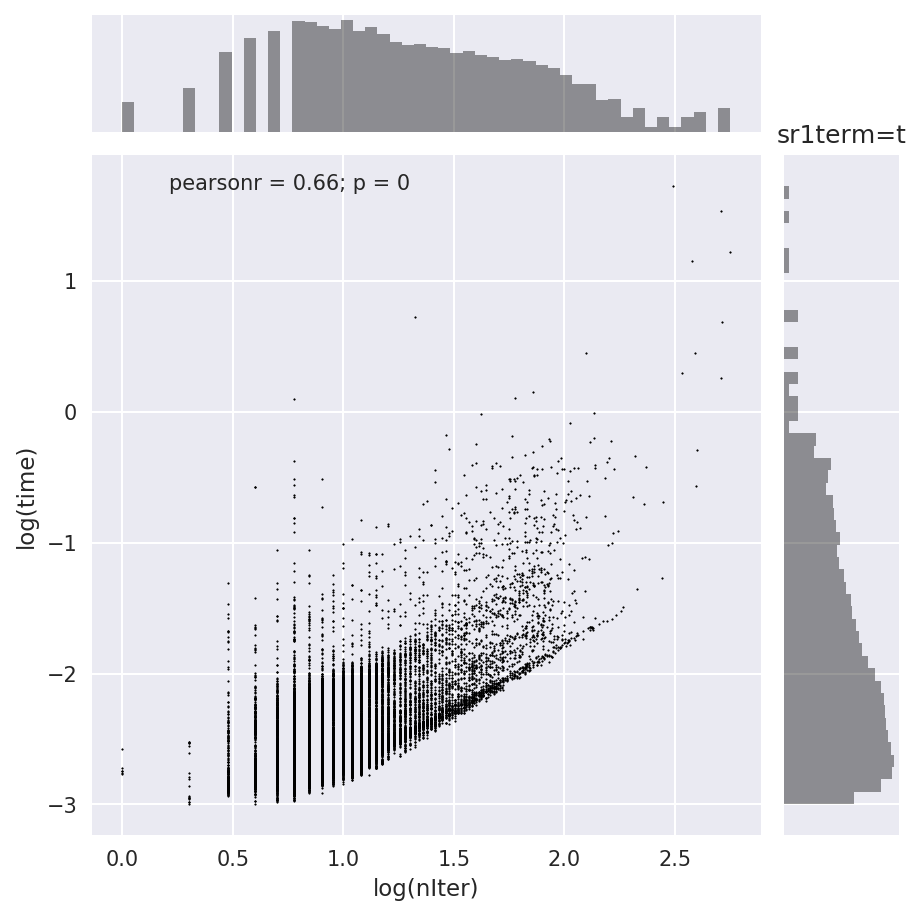

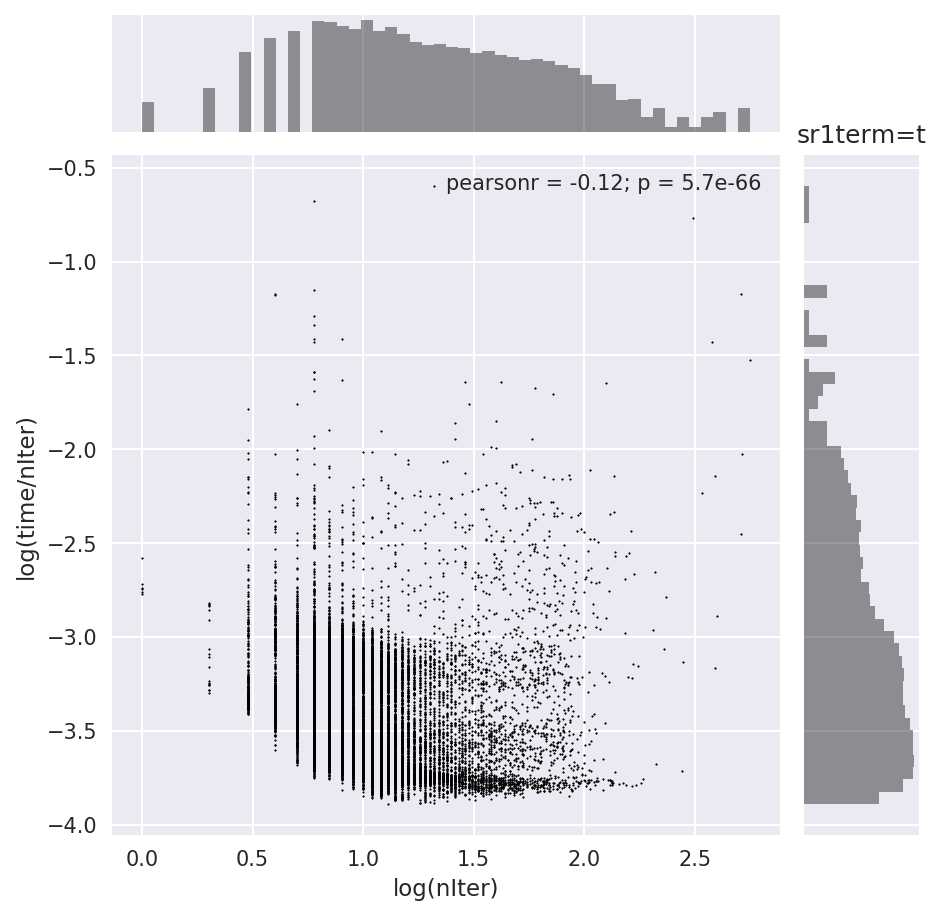

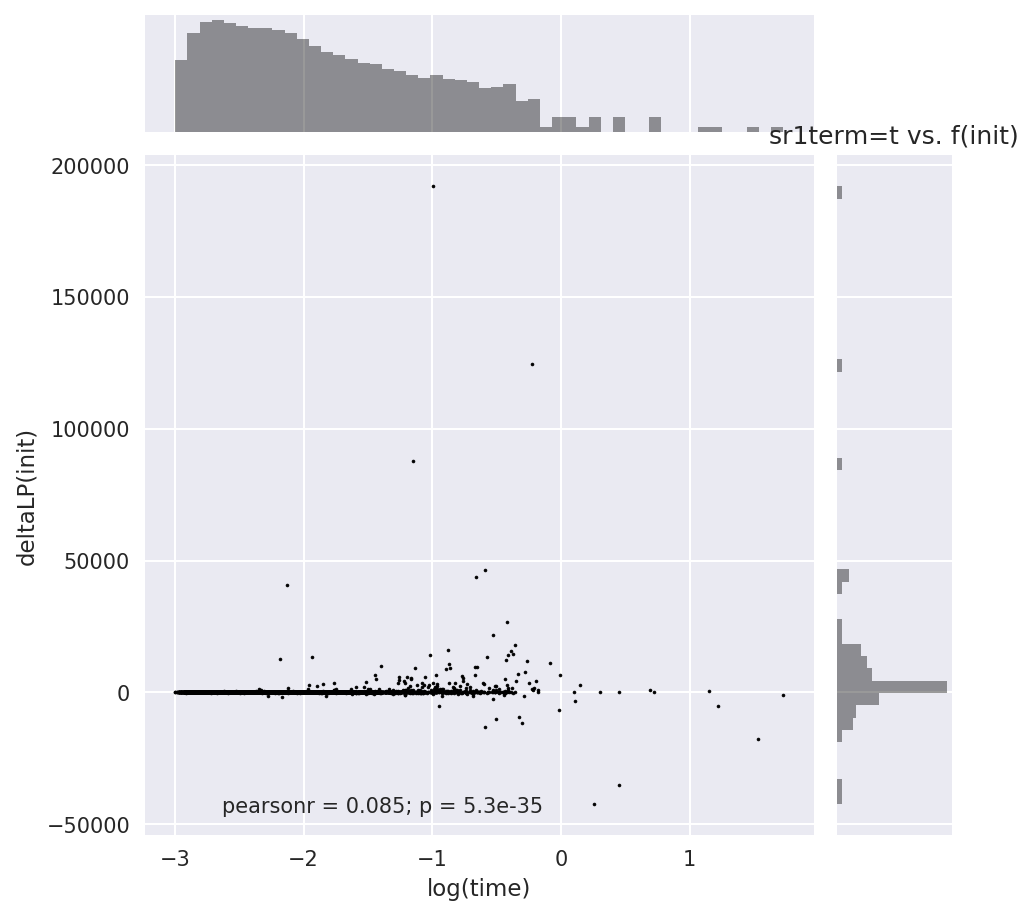

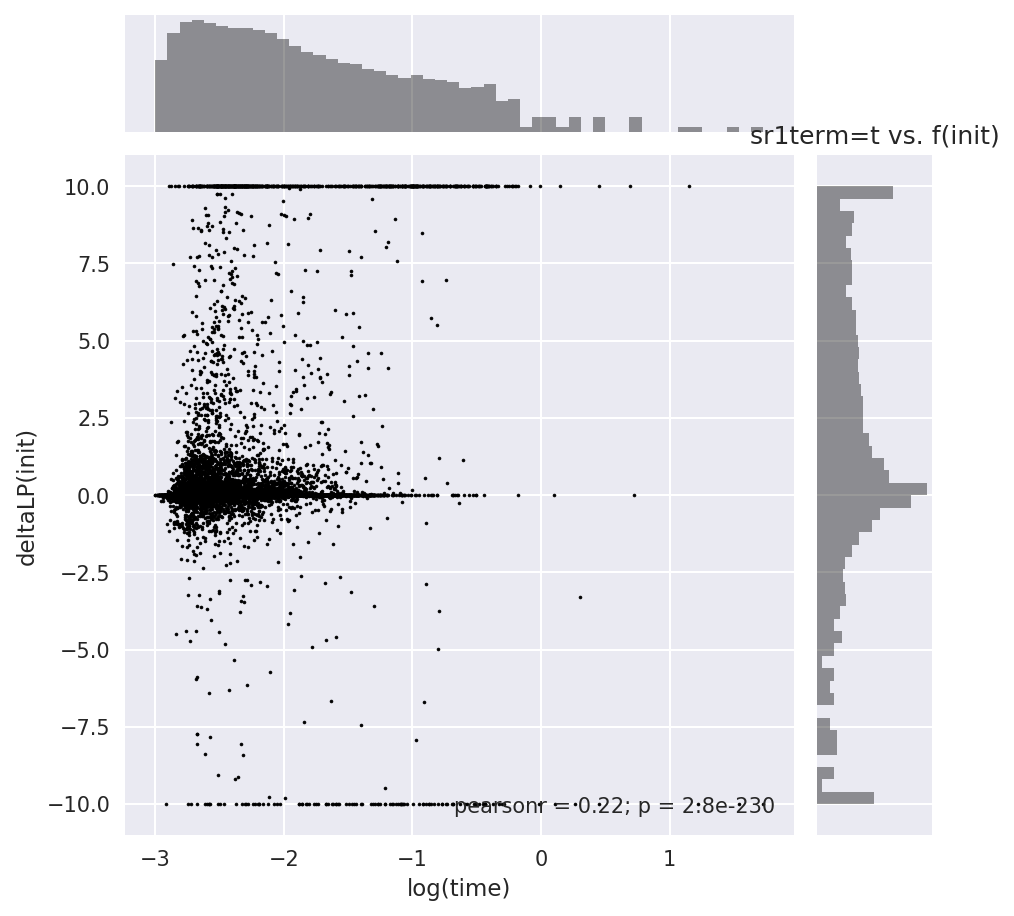

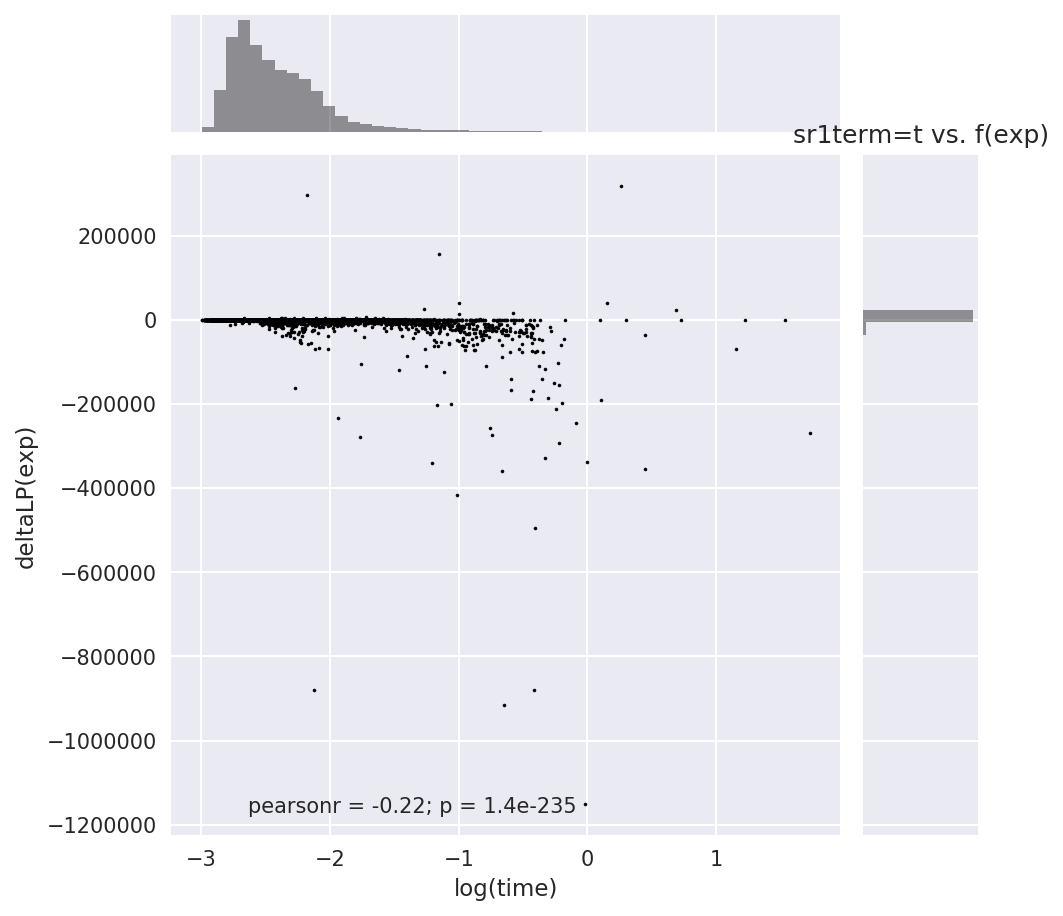

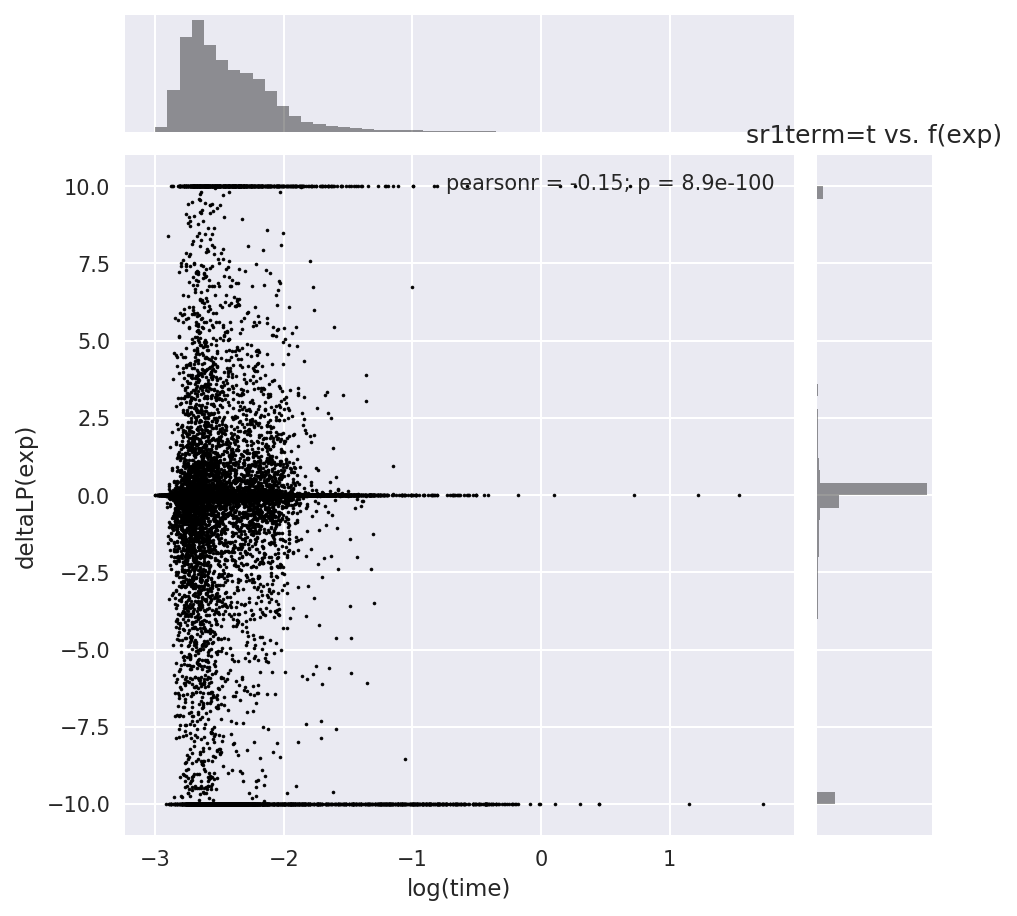

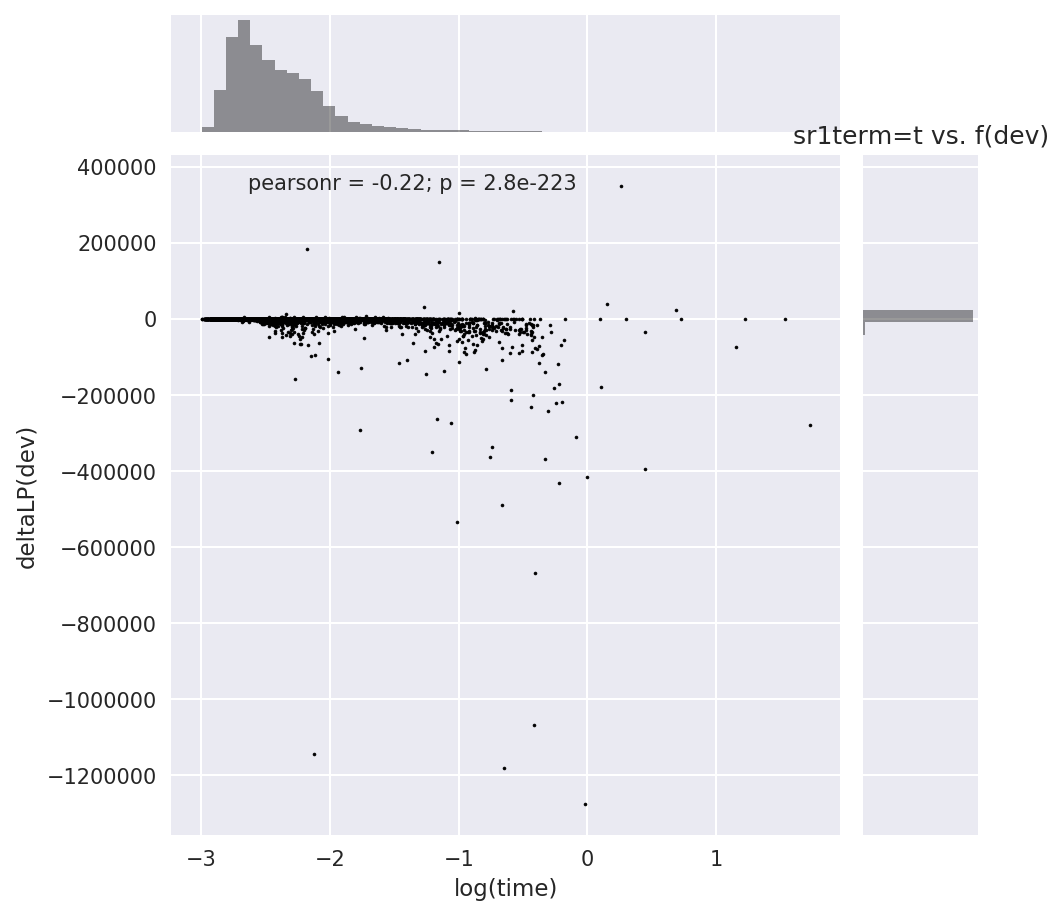

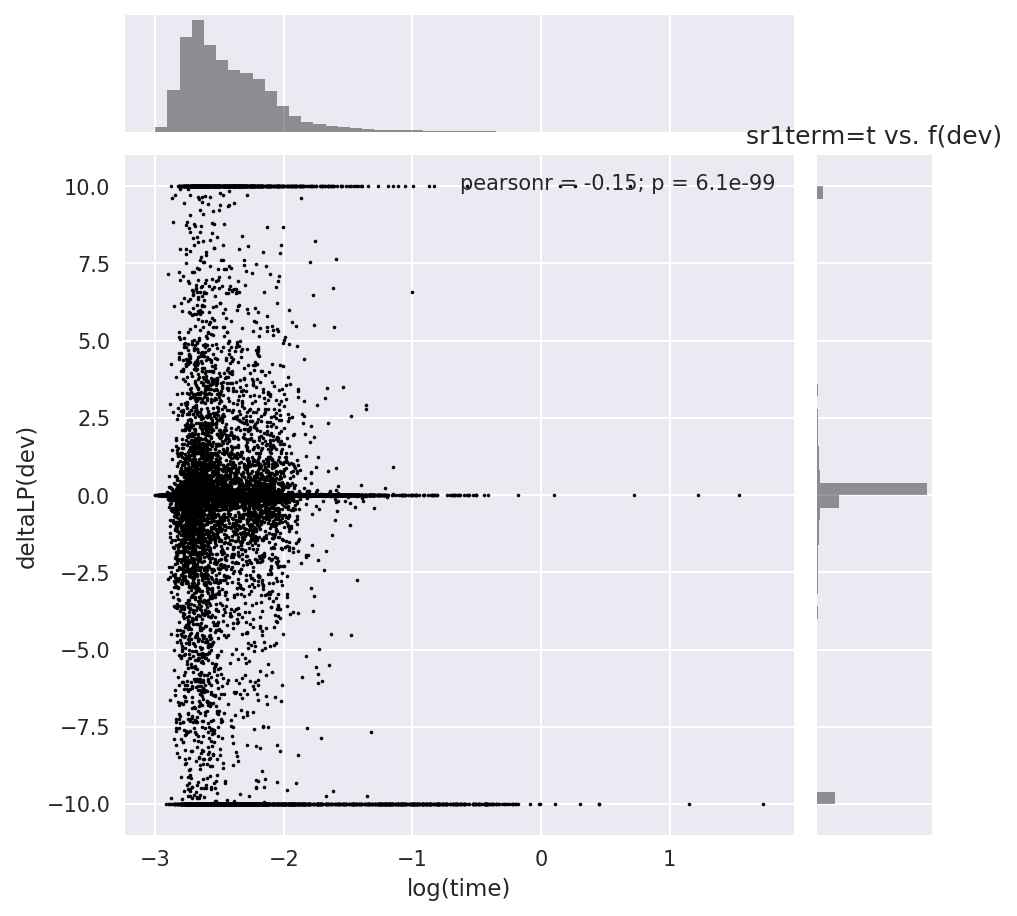

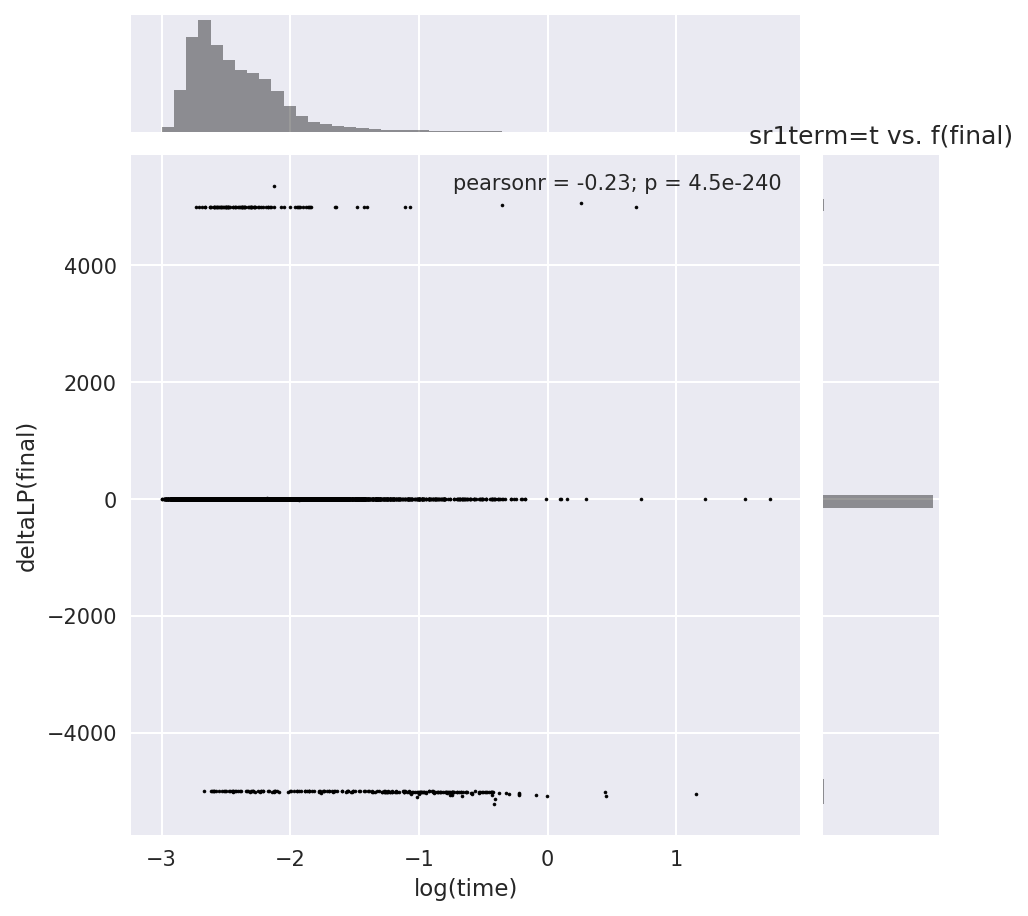

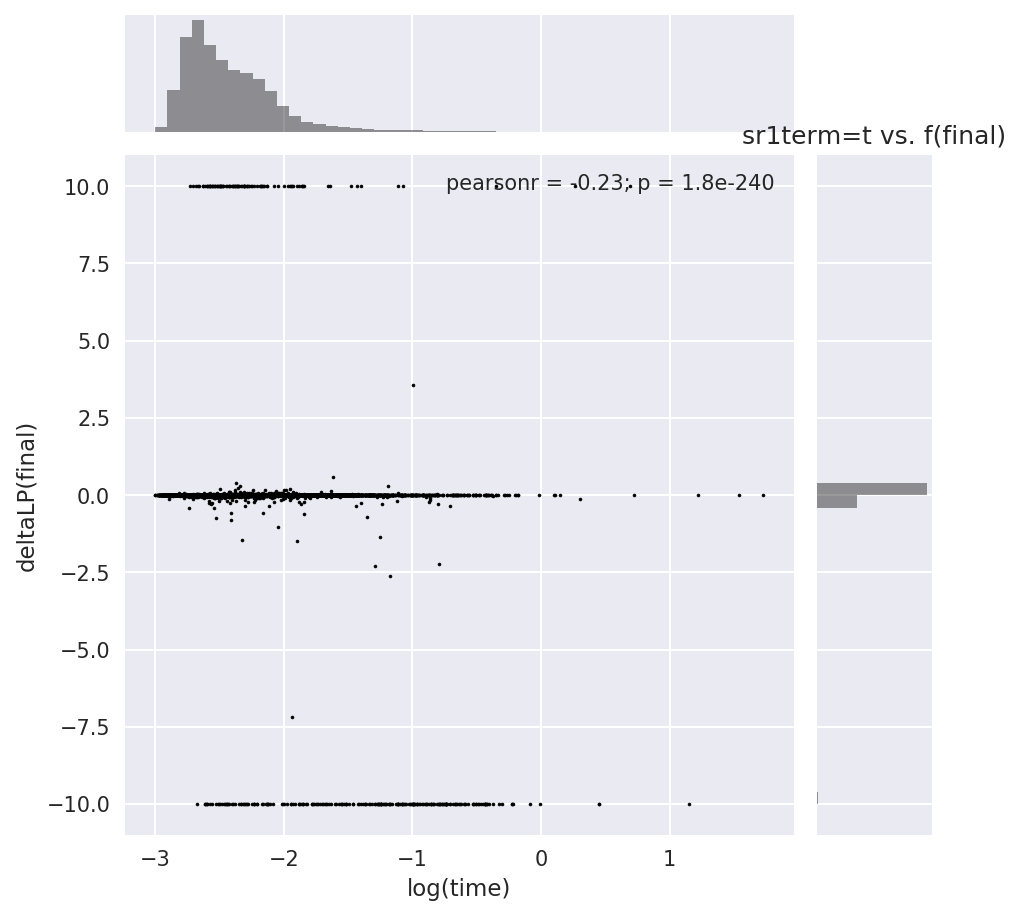

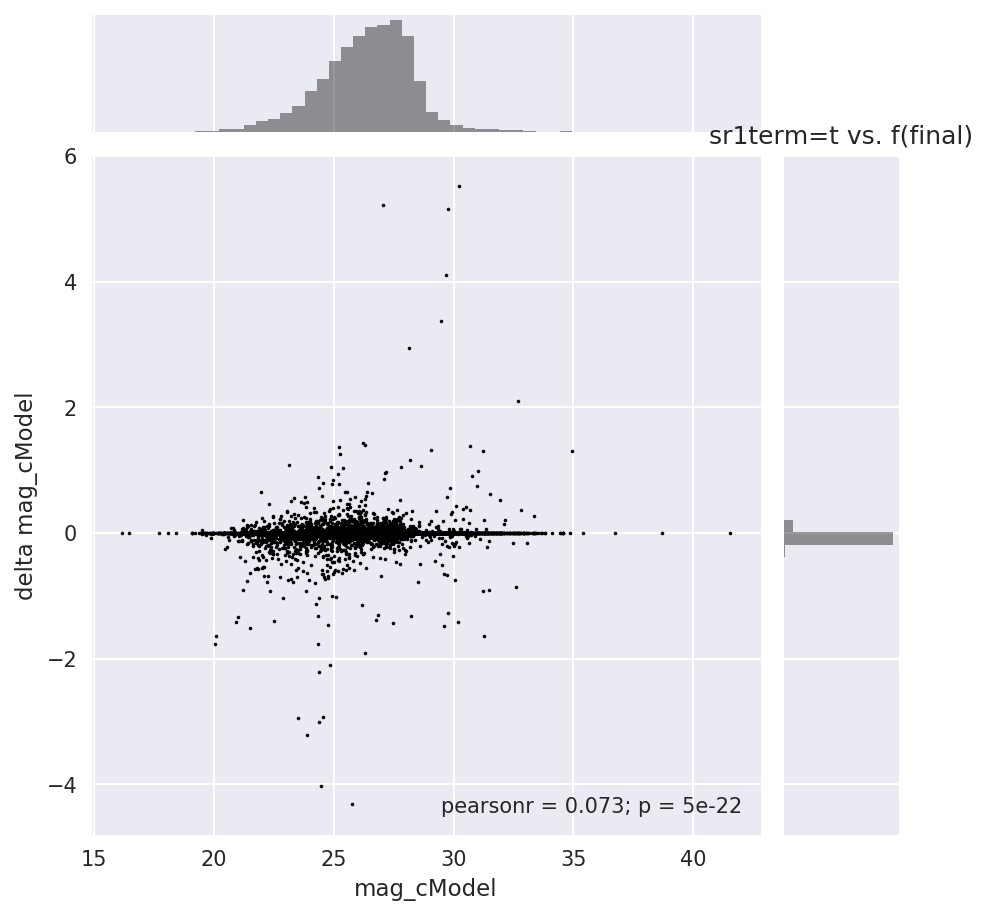

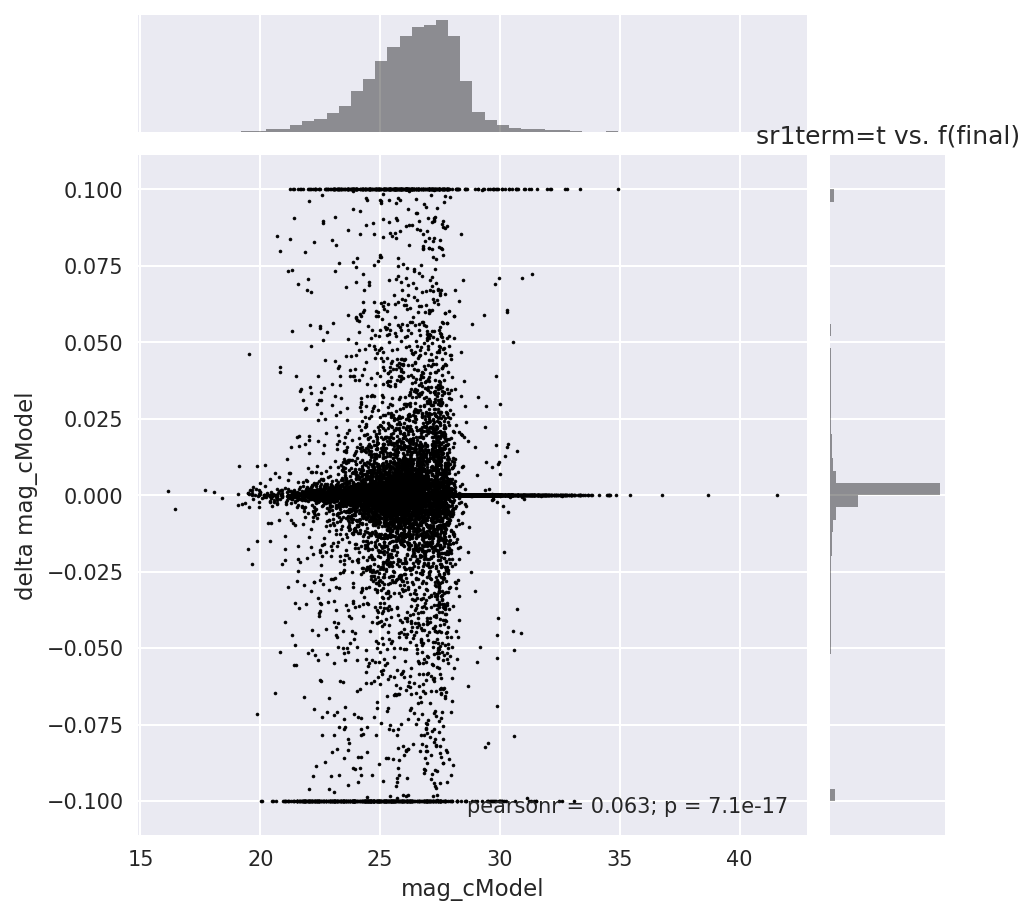

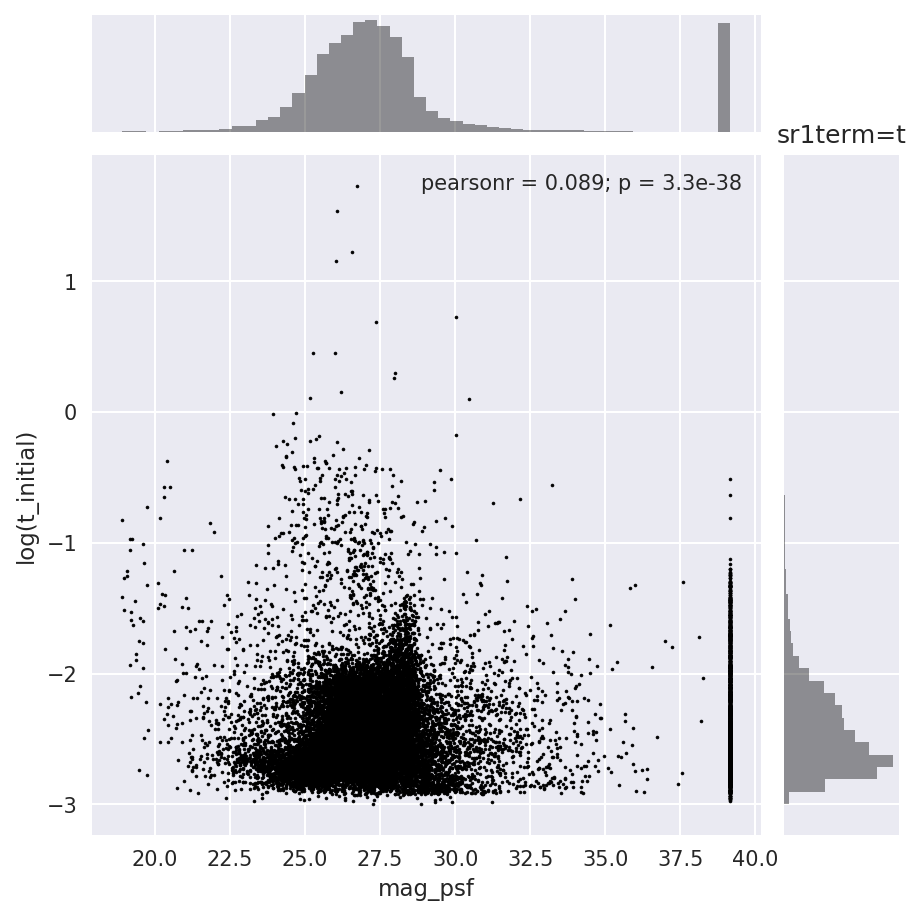

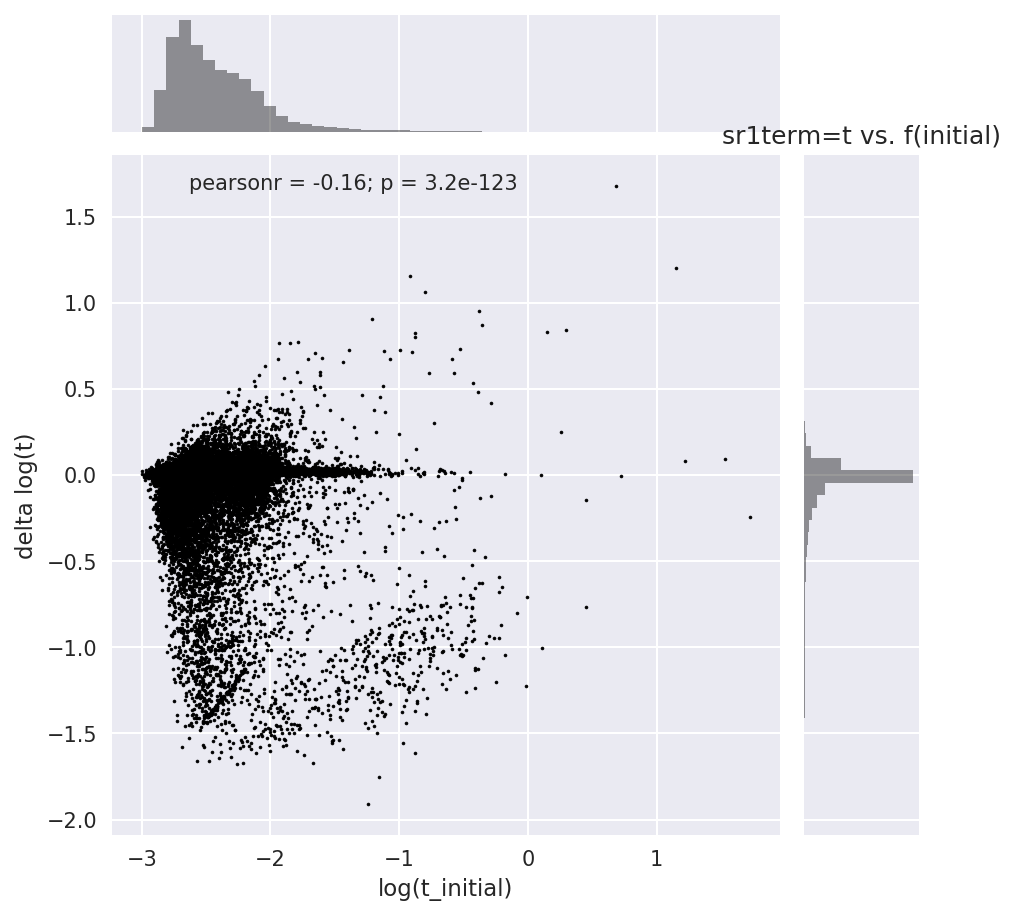

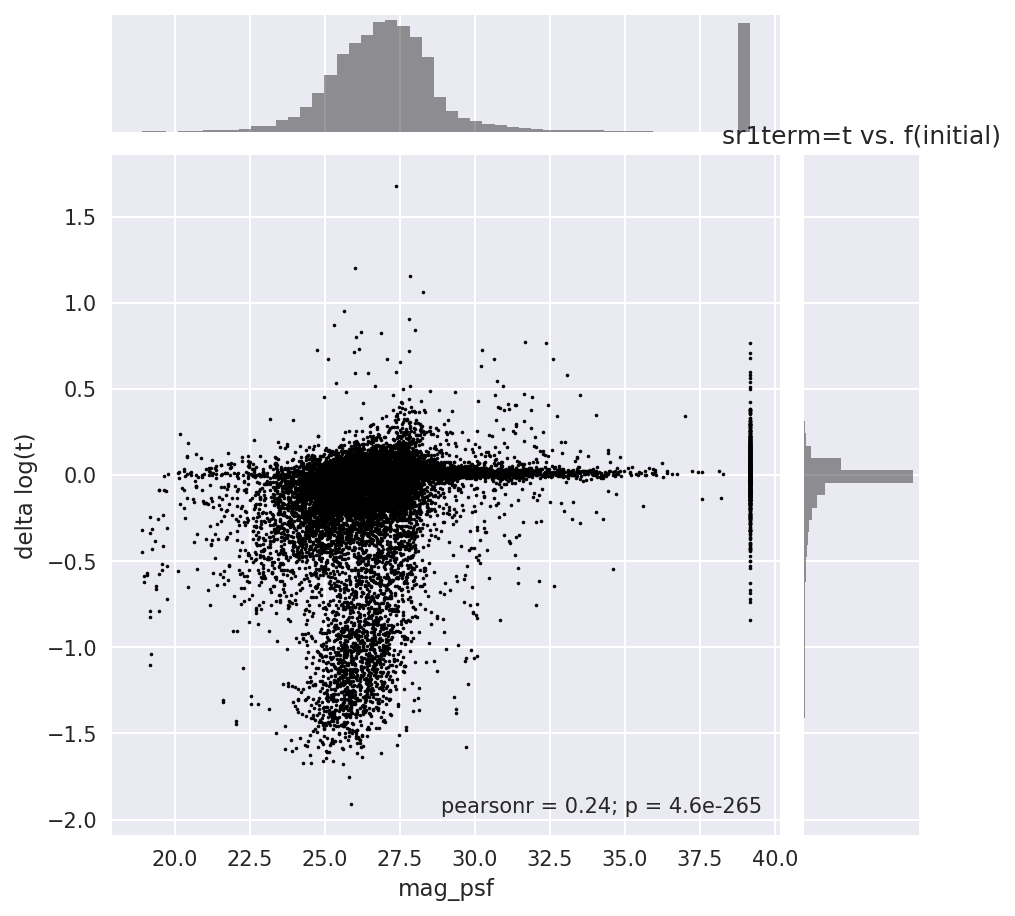

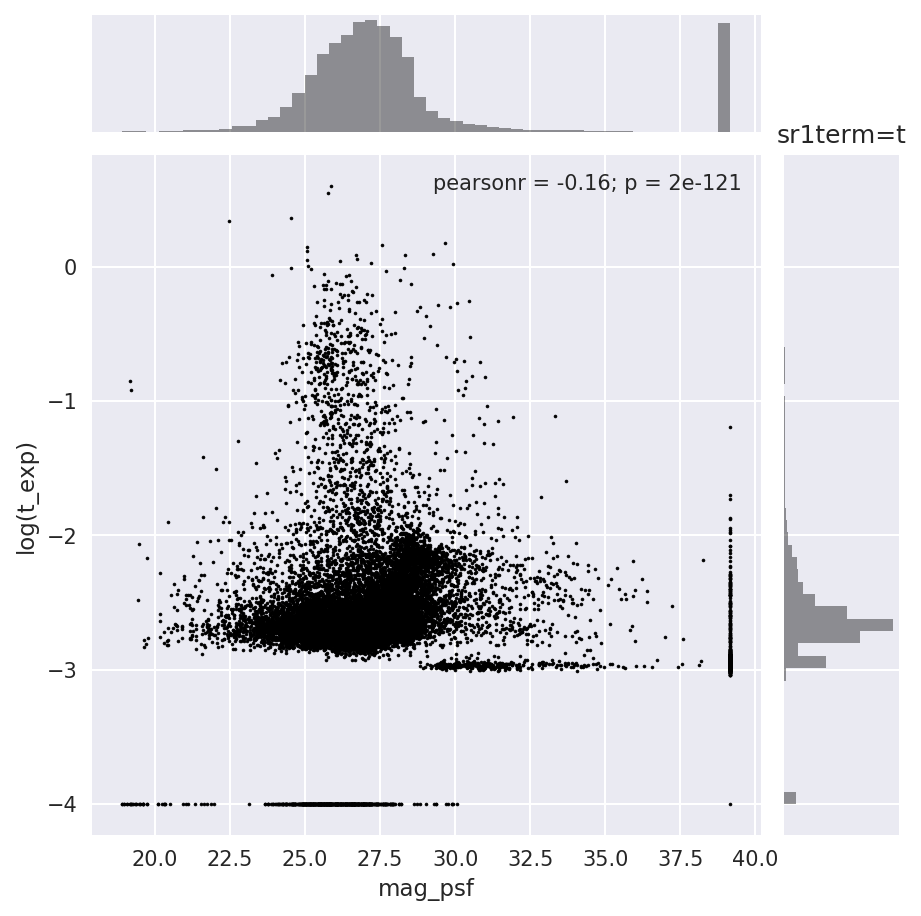

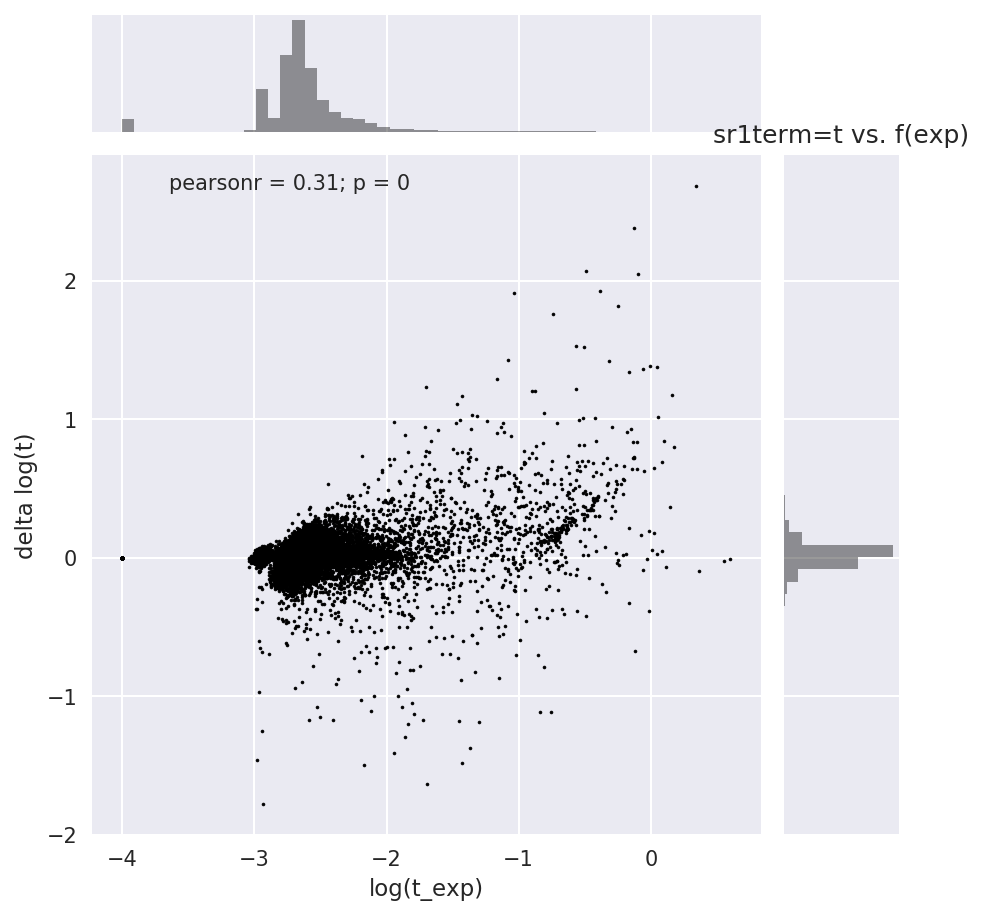

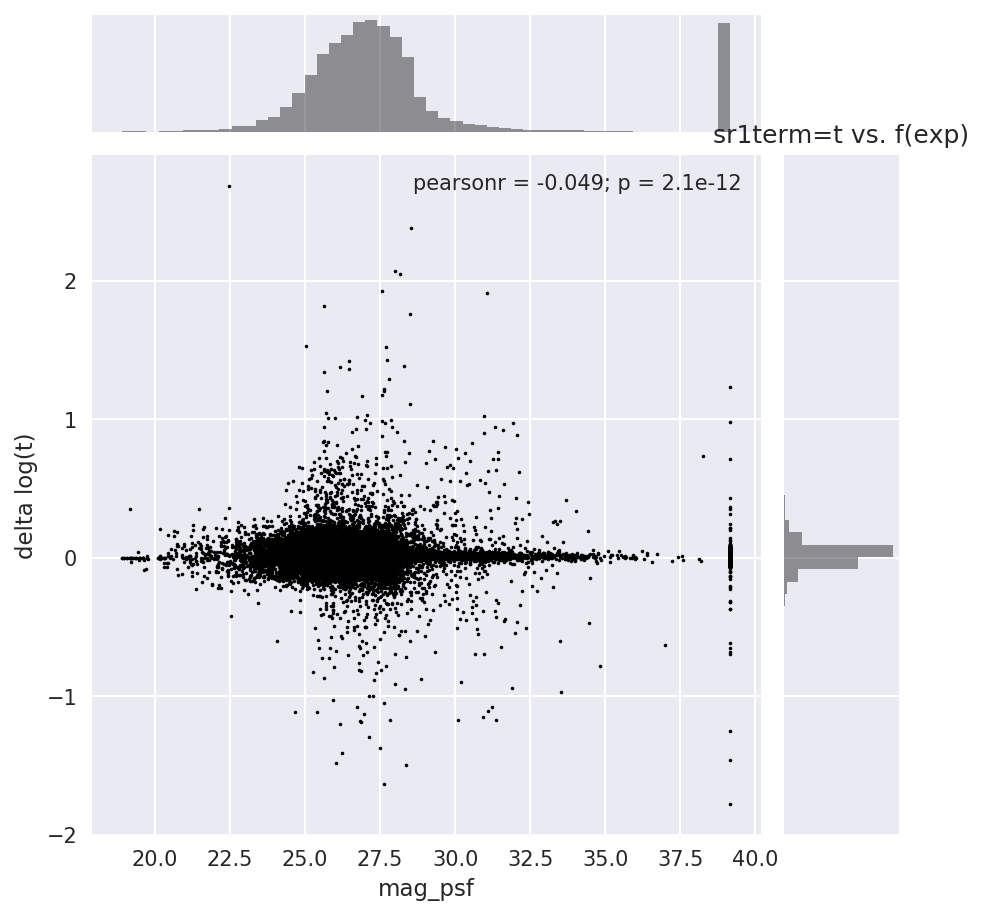

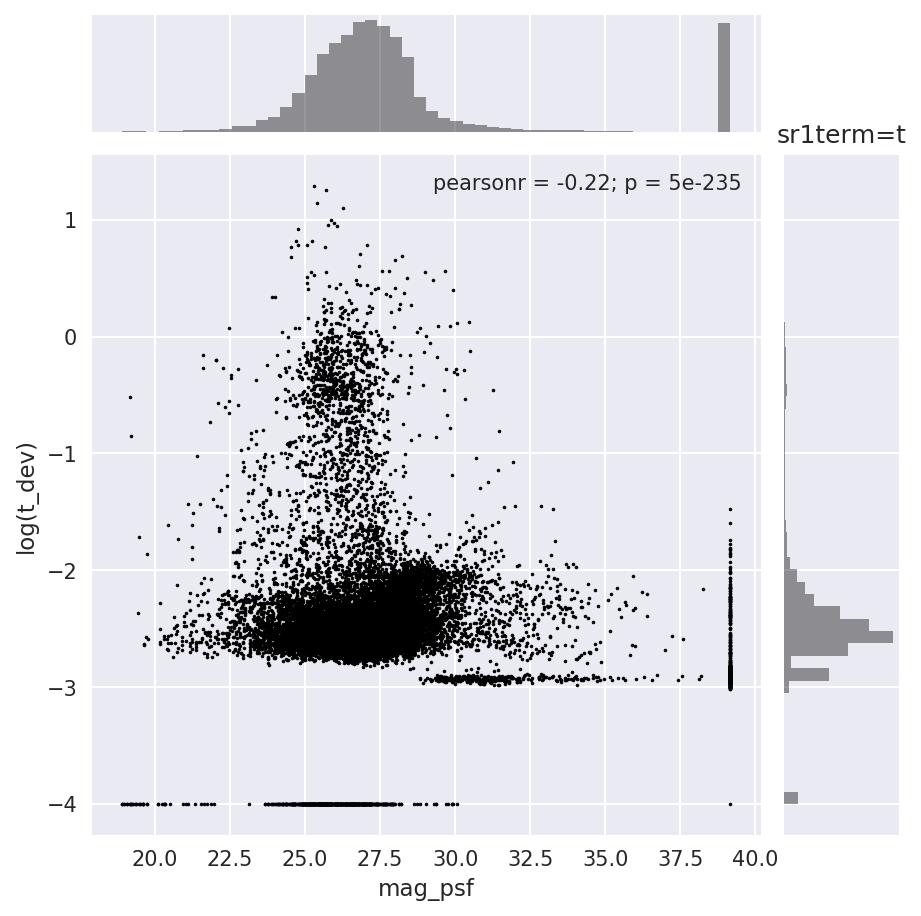

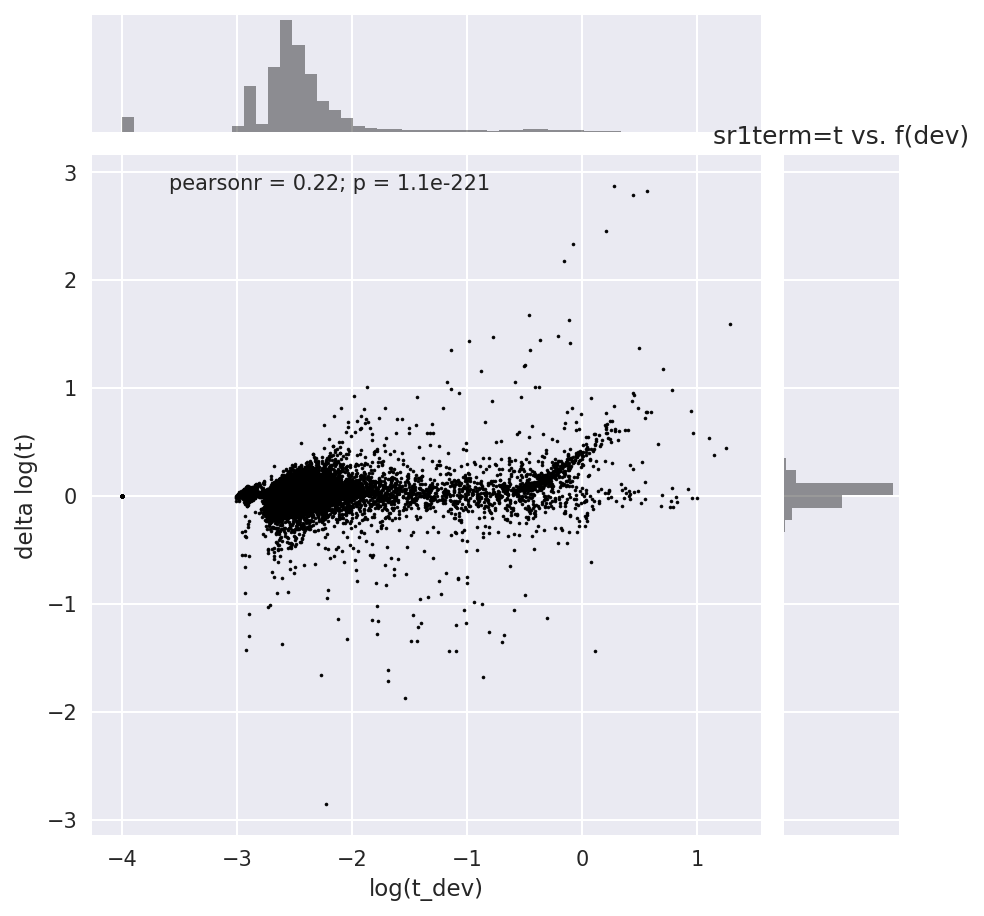

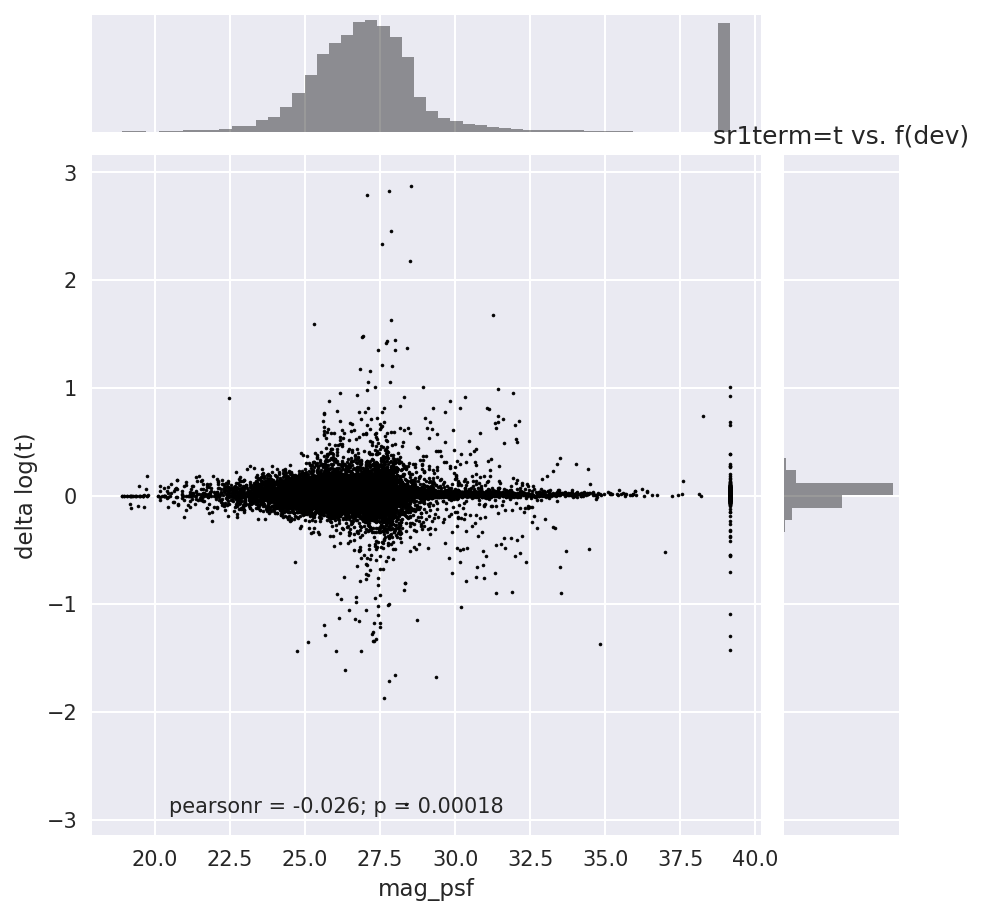

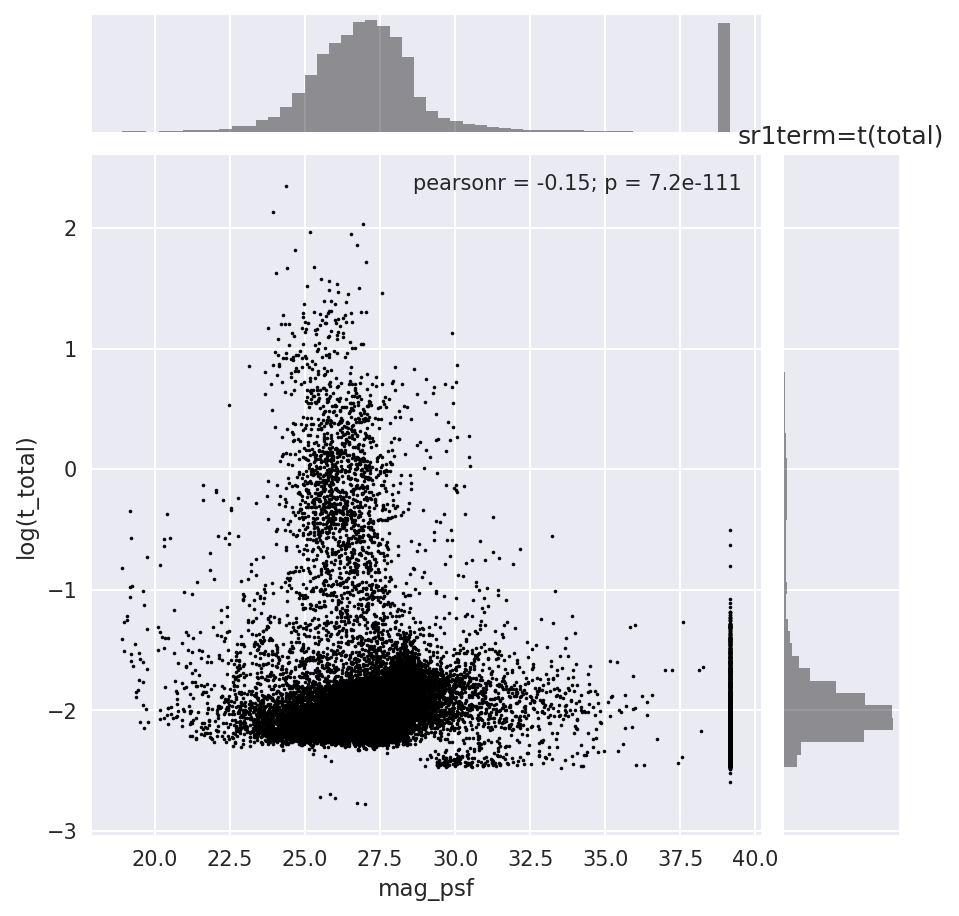

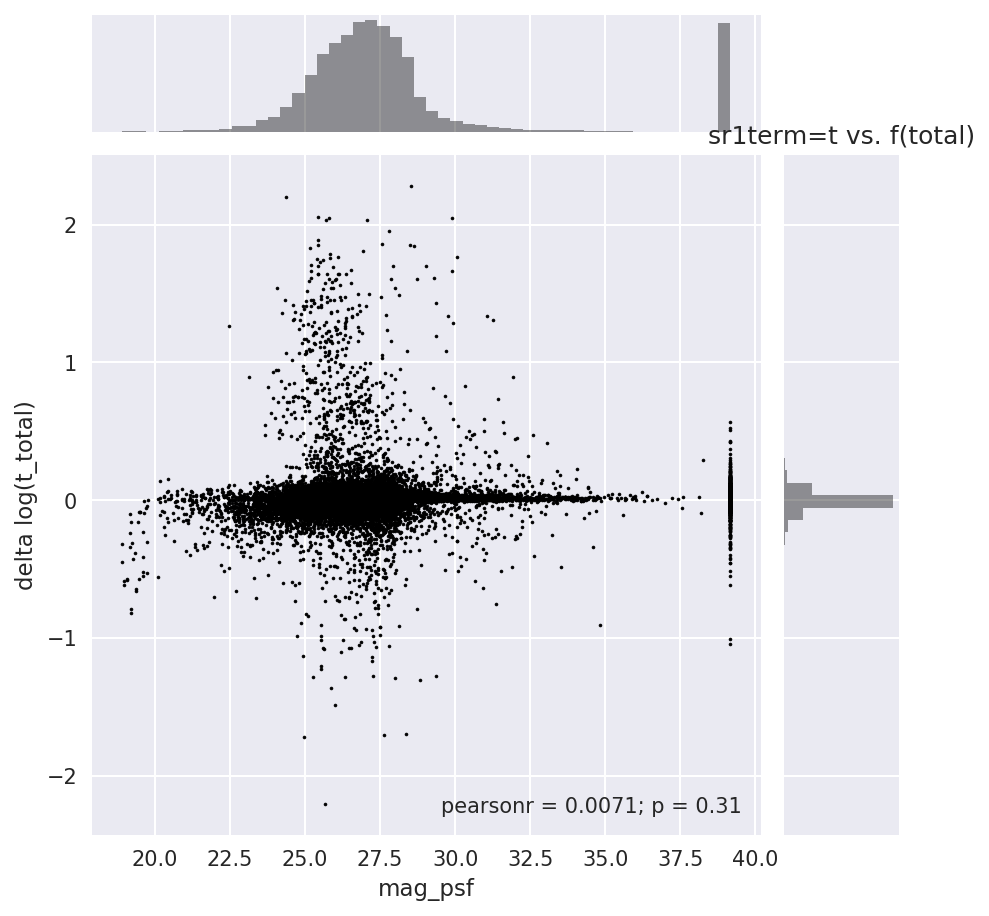

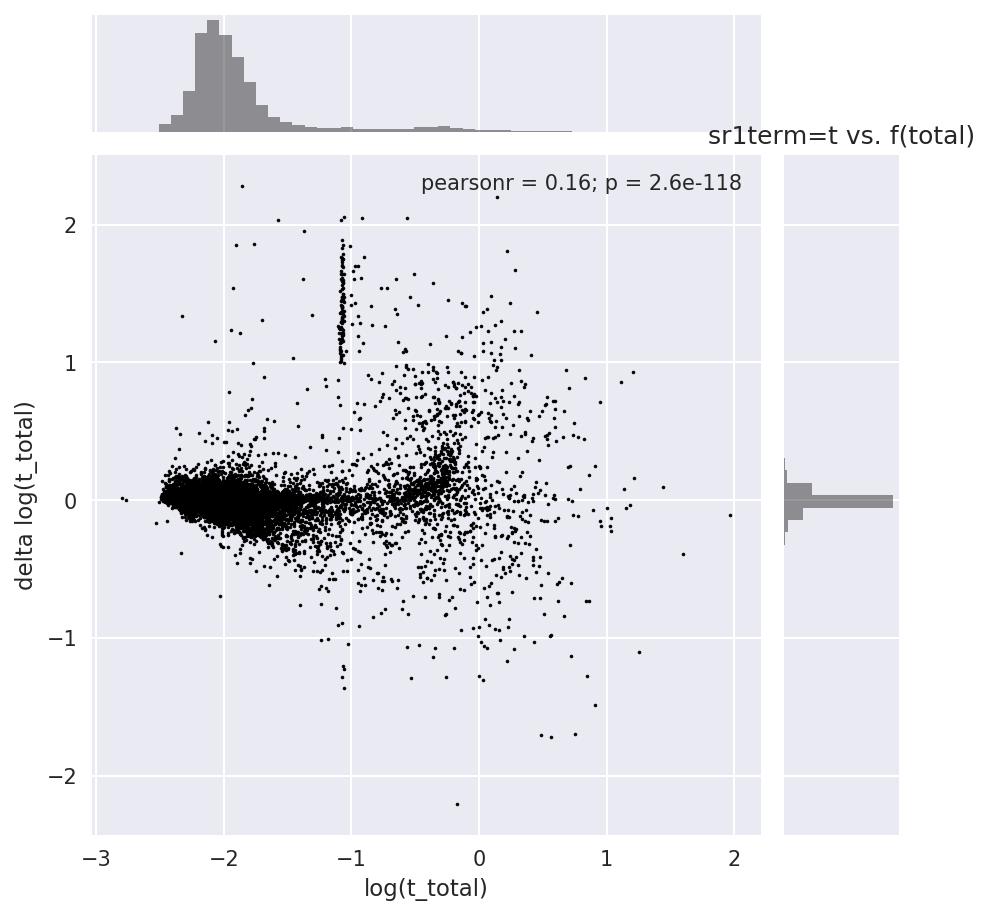

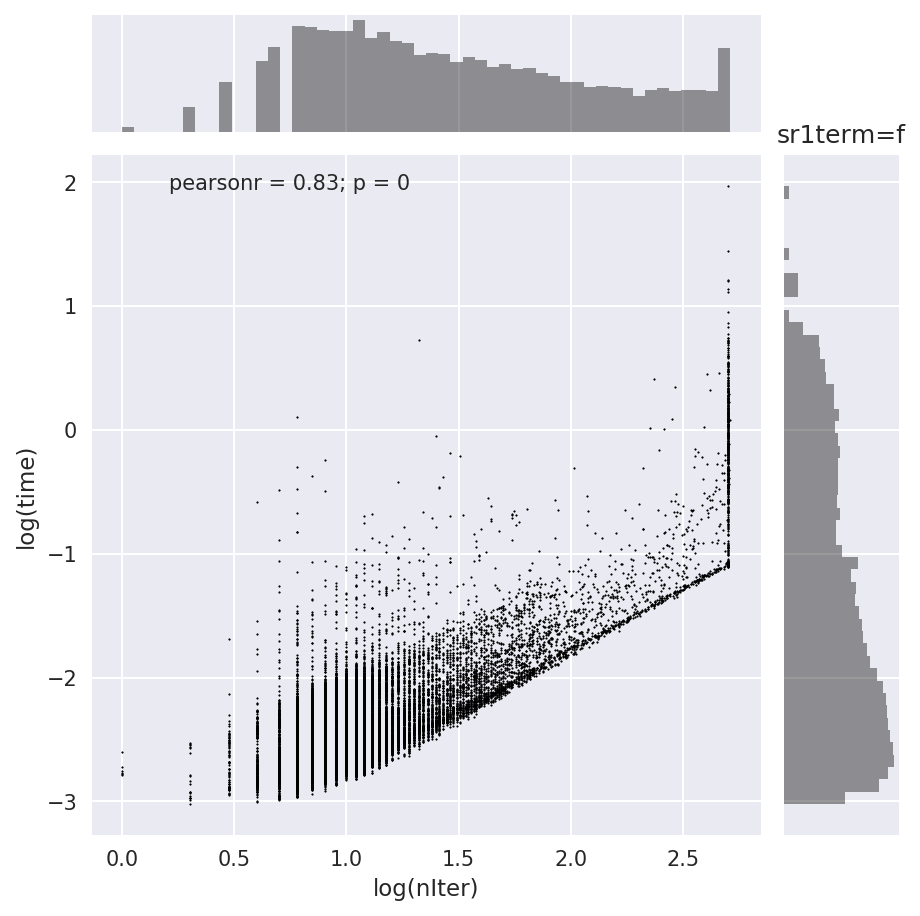

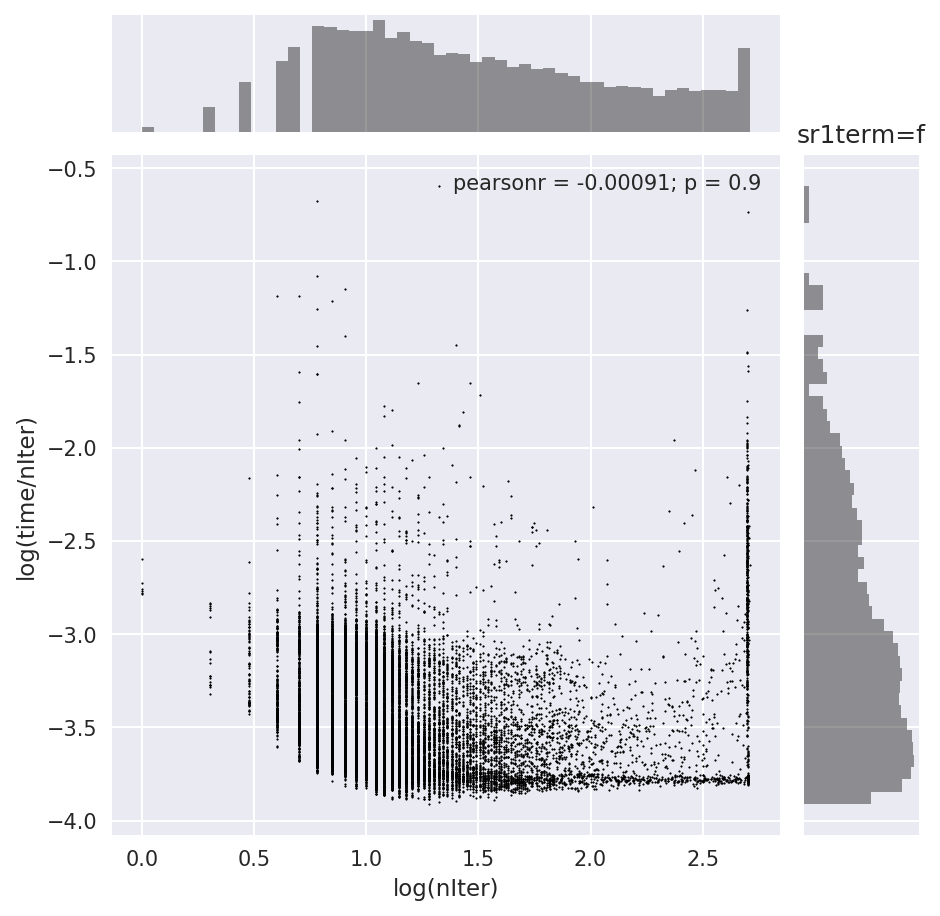

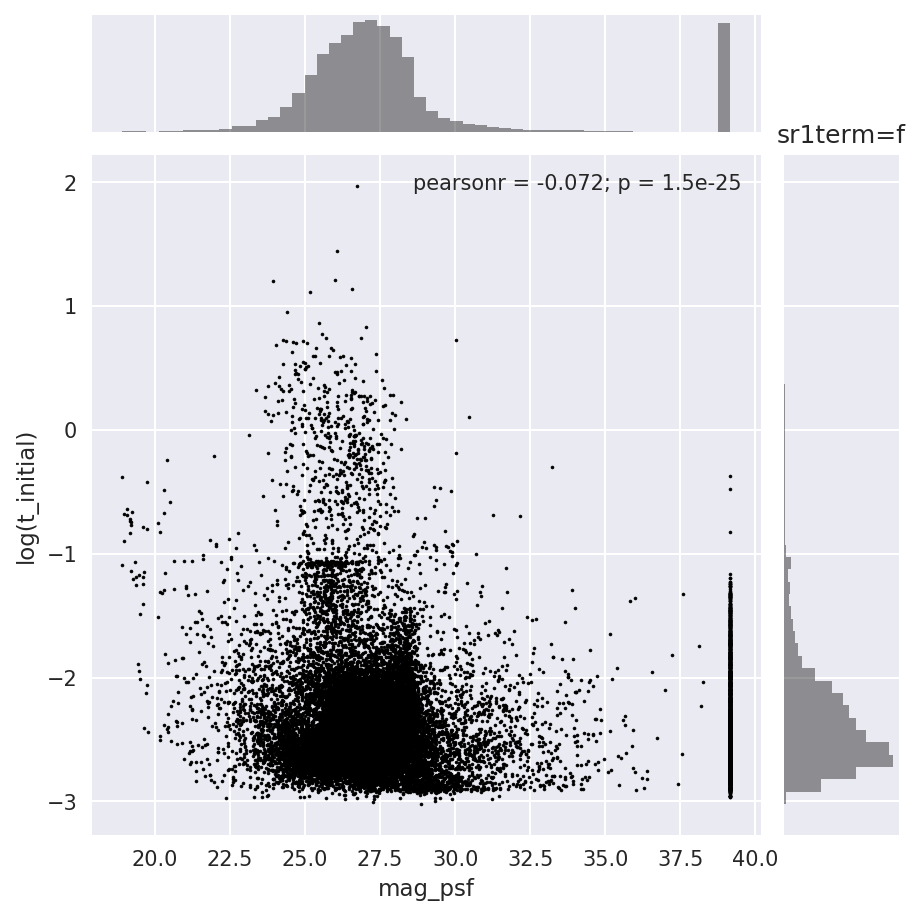

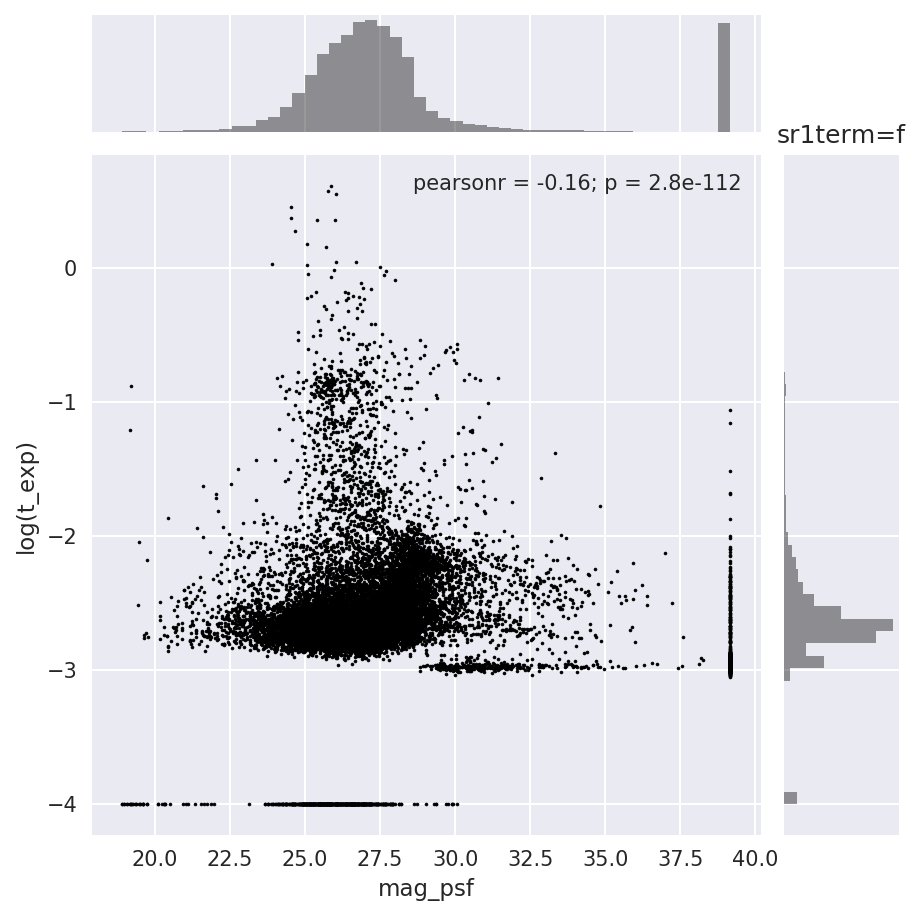

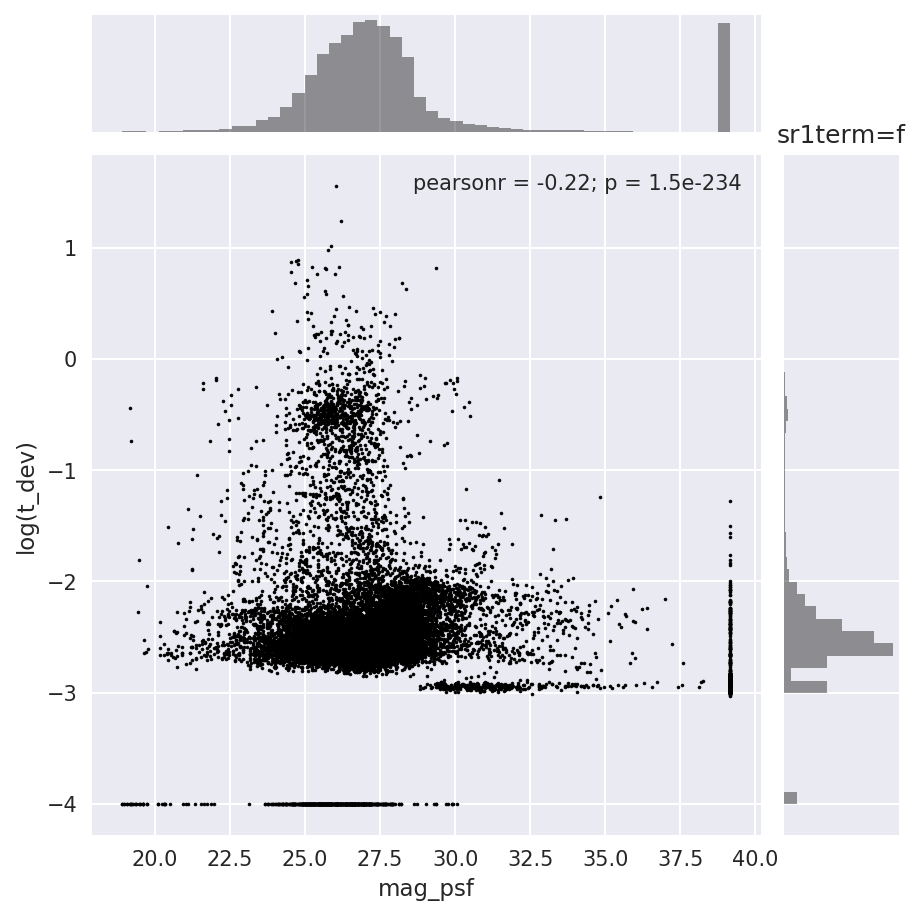

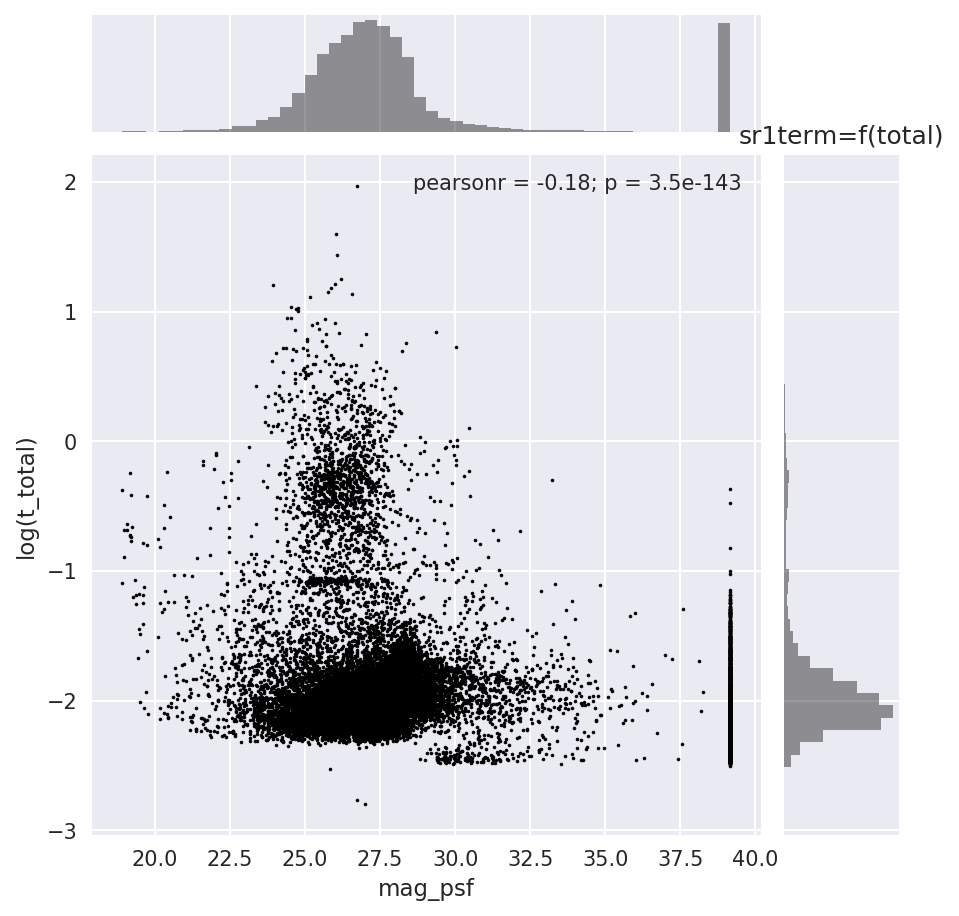

In [59]:
# Make an exhausting but not exhaustive set of plots comparing results between configurations

key = 'sr1term'
butlerdict = butlers[key]
sns.set_style("darkgrid", {'axes.labelcolor': '.15'})

for paramstr in cmodelparams[key]['names']:
    paramdefault = cmodelparams[key]['default']
    isdefault = paramstr == paramdefault
    meastable = butlerdict[paramstr]['measures']
    
    calexp = butlerdict[paramstr]['calexp']
    calib = calexp.getCalib()
    filt = meastable['modelfit_CModel_initial_nIter'] > 0
    filtsum = np.sum(filt)
    print('{:s}={:s} vs default={:s}; '
        'n_(nIter>0)={:d}, intersect w/default={:d}'.format(
            key, paramstr, paramdefault,
            filtsum,
            np.sum(filt & filtdefault)
        )
    )
    title = key + '=' + paramstr
    
    # Total time vs niters
    (sns.jointplot(
        x = np.log10(meastable['modelfit_CModel_initial_nIter'][filt]),
        y = np.log10(meastable['modelfit_CModel_initial_time'][filt]),
        color="k", joint_kws={'marker':'.', 's':2}, marginal_kws={'hist_kws' : {'log':True}})
    ).set_axis_labels("log(nIter)", "log(time)")
    plt.title(title)
    # .plot_joint(sns.kdeplot, zorder=0, n_levels=10)
    
    # Average time per iter
    (sns.jointplot(
        x = np.log10(meastable['modelfit_CModel_initial_nIter'][filt]),
        y = np.log10(meastable['modelfit_CModel_initial_time'][filt]/
                   meastable['modelfit_CModel_initial_nIter'][filt]),
        color="k", joint_kws={'marker':'.', 's':2}, marginal_kws={'hist_kws' : {'log':True}})
    ).set_axis_labels("log(nIter)", "log(time/nIter)")
    plt.title(title)
    
    # Check running times
    timetotal = 0
    for fittype in fittypes:
        timefit = meastable['modelfit_CModel_' + fittype + '_time']
        timefitsum = np.sum(timefit)
        print('t_' + fittype + '_total=' + str(timefitsum))
        timetotal += timefitsum
    print('t_total=' + str(timetotal))
    
    # Compare objective (log probability) values with default setting
    if not isdefault:
        for objname, objcode in {"init": "_initial", "exp" : "_exp", "dev": "_dev", "final" : ""}.items():
            objective = "modelfit_CModel" + objcode + "_objective"
            y = meastable[objective][filt]
            
            if objname != "init":
                y[~np.isfinite(y)] = objectivedefaultvalue
            
            if objname == "final":
                # TOOD: replace with histogram
                #print(pd.value_counts(np.round(y,3)).sort_index())
                print('objective(' + objname + ')', spstats.describe(y))
                y2 = objectivedefaultfinal
            else:
                y2 = meastabledefault[objective][filt]
                if objname != 'init':
                    y2[~np.isfinite(y2)] = objectivedefaultvalue
            # the objective are -ln(L) so we want ln(objective) - ln(objectivedefault)
            y = y2 - y
                
            print('deltaobj(' + objname + ')', spstats.describe(y))
            loghist = objname == "init"
            
            x = np.log10(meastable['modelfit_CModel_initial_time'][filt])
            titlecompare = title + " vs. " + paramdefault + "(" + objname + ")"
            # Plot delta objective vs time
            (sns.jointplot(
                x = x
                , y = y, color="k"
                , joint_kws={'marker':'.', 's':8}
                , marginal_kws={'hist_kws' : {'log':loghist}}
            )).set_axis_labels("log(time)", "deltaLP(" + objname + ")")
            plt.title(titlecompare)
            y[y > 10] = 10
            y[y < -10] = -10
            
            # Same delta objective vs time with smaller limits
            (sns.jointplot(
                x = x
                , y = y, color="k"
                , joint_kws={'marker':'.', 's':8}
                , marginal_kws={'hist_kws' : {'log':loghist}}
            )).set_axis_labels("log(time)", "deltaLP(" + objname + ")")
            plt.title(titlecompare)
        
        # Compare final cModel mags
        x = meastable['modelfit_CModel_flux'][filt]
        plt.title(titlecompare)
        filtx = (x > 0) * np.isfinite(x) \
            *(meastabledefault['modelfit_CModel_flux'][filt] > 0) \
            *np.isfinite(meastabledefault['modelfit_CModel_flux'][filt])
        x = calib.getMagnitude(x[filtx])

        deltamag = x - calib.getMagnitude(meastabledefault\
            ['modelfit_CModel_flux'][filt][filtx])

        # Delta mag vs mag
        for magcrop in [False, True]:
            if magcrop:
                deltamag[deltamag > 0.1] = 0.1
                deltamag[deltamag < -0.1] = -0.1
            (sns.jointplot(
                x = x
                ,y = deltamag
                ,color="k"
                ,joint_kws={'marker':'.', 's':8}
                ,marginal_kws={'hist_kws' : {'log':loghist}}
            )).set_axis_labels("mag_cModel", "delta mag_cModel")
            plt.title(titlecompare)
            
    # Time spent in each fit stage
    timefittotal = np.zeros(filtsum)
    timefitdefaulttotal = np.zeros(filtsum)
    timemin = 1e-4

    for fittype in fittypes:
        timefitname = 'modelfit_CModel_' + fittype + '_time'
        # Should write a function for this and many things above
        timefit = meastable[timefitname][filt]
        timefittotal += timefit
        timefittoosmall = timefit < timemin
        timefitdefault = meastabledefault[timefitname][filt]
        timefitdefaulttotal += timefitdefault
        timefitdefaulttoosmall = timefitdefault < timemin
        print(timefitname,
            'n_(timefit<{:.2f})={:d}, '
            'n_(timefitdefault<{:.2f})={:d}, '\
            .format(
                timemin
                ,np.sum(timefittoosmall)
                ,timemin
                ,np.sum(timefitdefaulttoosmall)
            )
        )
        print(spstats.describe(timefit))
        timefittoosmall = timefittoosmall | timefitdefaulttoosmall
        timefit[timefittoosmall] = timemin
        timefitdefault[timefittoosmall] = timemin

        x = meastable['slot_PsfFlux_flux'][filt]
        filtx = x>0
        x[~filtx] = np.min(x[filtx])
        x = calib.getMagnitude(x)
        # Time vs flux
        (sns.jointplot(
            x = x
            ,y = np.log10(timefit)
            ,color="k"
            ,joint_kws={'marker':'.', 's':8}
            ,marginal_kws={'hist_kws' : {'log':loghist}}
        )).set_axis_labels('mag_psf', 'log(t_' + fittype + ')')
        plt.title(title)

        if not isdefault:
            
            y = np.log10(timefit/timefitdefault)
            
            # Delta time vs time
            (sns.jointplot(
                x = np.log10(timefit)
                , y = y
                , color="k"
                ,joint_kws={'marker':'.', 's':8}
                , marginal_kws={'hist_kws' : {'log':loghist}}
            )).set_axis_labels('log(t_' + fittype + ')', 'delta log(t)')
            plt.title(title + " vs. " + paramdefault + "(" + fittype + ")")
            
            # Delta time vs psfmag
            (sns.jointplot(
                x = x
                , y = y
                , color="k"
                , joint_kws={'marker':'.', 's':8}
                , marginal_kws={'hist_kws' : {'log':loghist}}
            )).set_axis_labels('mag_psf', 'delta log(t)')
            plt.title(title + " vs. " + paramdefault + "(" + fittype + ")")

    y = np.log10(timefittotal)
    # x = mag_psf here
    (sns.jointplot(
        x = x
        , y = y
        , color="k"
        , joint_kws={'marker':'.', 's':8}
        , marginal_kws={'hist_kws' : {'log':loghist}}
    )).set_axis_labels('mag_psf','log(t_total)')
    plt.title(title + "(total)")
    
    if not isdefault:
        logt = np.log10(timefitdefaulttotal)
        y -= logt
        (sns.jointplot(
            x = x
            , y = y
            , color="k"
            , joint_kws={'marker':'.', 's':8}
            , marginal_kws={'hist_kws' : {'log':loghist}}
        )).set_axis_labels('mag_psf','delta log(t_total)')
        plt.title(title + " vs. " + paramdefault + "(total)")
        
        (sns.jointplot(
            x = logt
            , y = y
            , color="k"
            , joint_kws={'marker':'.', 's':8}
            , marginal_kws={'hist_kws' : {'log':loghist}}
        )).set_axis_labels('log(t_total)', 'delta log(t_total)')
        plt.title(title + " vs. " + paramdefault + "(total)")
    
plt.show()